
- Objective: Predict the future sale price of London houses based on their features.
- Type: Supervised regression
- Metric: Mean Absolute Error (MAE)

# 📌 Step 2: Import Libraries
Import essential Python libraries for data analysis, visualization, and modeling.

In [518]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# 📌 Step 3: Load the Data
- Load train.csv, test.csv, and sample_submission.csv
- Display basic info and head of each file

In [519]:
train=pd.read_csv('Data/train.csv')
test=pd.read_csv('Data/test.csv')

# sample=pd.read_csv('Data/sample_submission.csv')

train.head()

,ID,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year,price
0,0,"38 Adelina Grove, London, E1 3AD",E1 3AD,England,E1,51.519406,-0.053261,NaN,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000
1,1,"6 Cleveland Grove, London, E1 4XL",E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995
2,2,"65 Sanderstead Road, London, E10 7PW",E10 7PW,England,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,D,1,1995,59000
3,3,"5 Queenswood Gardens, London, E11 3SE",E11 3SE,England,E11,51.564212,0.026292,NaN,2.0,72.0,1.0,Leasehold,Purpose Built Flat,NaN,1,1995,51500
4,4,"12 Woodlands Road, London, E11 4RW",E11 4RW,England,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,D,1,1995,63500


In [520]:

print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (266325, 17)
Test data shape: (16547, 16)


In [521]:
train.describe()

,ID,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,sale_month,sale_year,price
count,266325.000000,266325.000000,266325.000000,217846.000000,241482.000000,252519.000000,229285.000000,266325.000000,266325.000000,2.663250e+05
mean,133162.000000,51.510090,-0.104639,1.439471,2.496140,99.624088,1.292160,6.805670,2012.213855,6.161788e+05
std,76881.549558,0.056709,0.088074,0.721365,1.172209,56.454683,0.583029,3.356693,9.143113,1.274105e+06
min,0.000000,51.385708,-0.347055,1.000000,1.000000,10.000000,1.000000,1.000000,1995.000000,1.000000e+04
25%,66581.000000,51.466685,-0.159167,1.000000,2.000000,63.000000,1.000000,4.000000,2004.000000,2.165000e+05
50%,133162.000000,51.507202,-0.108622,1.000000,2.000000,85.000000,1.000000,7.000000,2014.000000,3.850000e+05
75%,199743.000000,51.550937,-0.049202,2.000000,3.000000,118.000000,1.000000,10.000000,2021.000000,6.500000e+05
max,266324.000000,51.665823,0.139249,9.000000,9.000000,500.000000,9.000000,12.000000,2023.000000,1.000000e+08


In [522]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-null  float64
 10  livingRooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertyType         265817 non-null  object 
 13  currentEnergyRating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_year        

In [523]:
train.price.max()

np.int64(100000000)

#  Step 4: Exploratory Data Analysis (EDA)






- Understand target variable distribution (SalePrice)


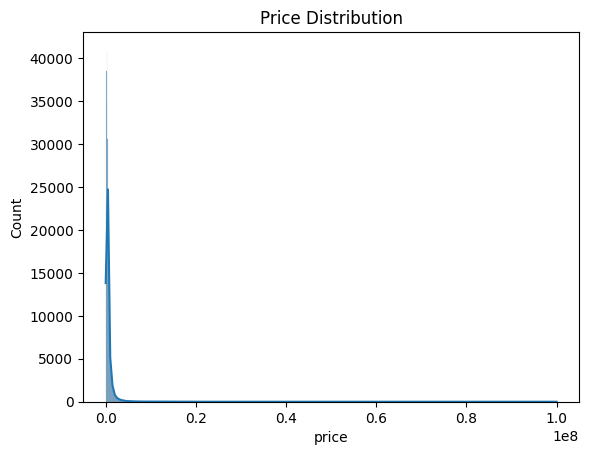

In [524]:
sns.histplot(train['price'], kde=True)
plt.title('Price Distribution')
plt.show()

we got right skew (positive)


In [525]:

print ("Skew is:", train.price.skew())


Skew is: 22.805953953940016


Skew is: 0.13087902577090224


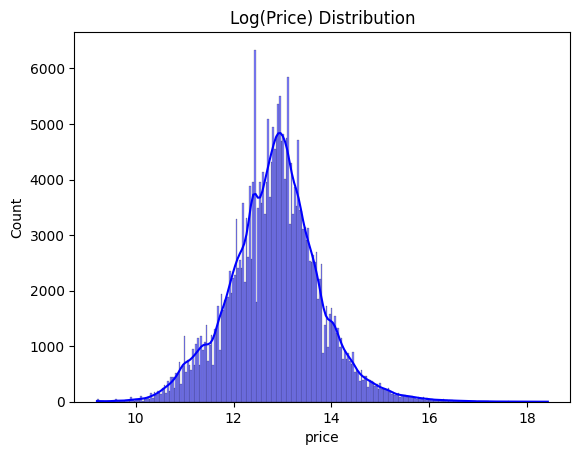

In [526]:
target = np.log1p(train.price)
print ("Skew is:", target.skew())
sns.histplot(target, color='blue',kde=True)
plt.title('Log(Price) Distribution')
plt.show()

now we got normal distribution (tend to look like Gaussian )

In [527]:
orginal_price=train['price'].copy()


In [528]:
train['price'].head()

0    77000
1    89995
2    59000
3    51500
4    63500
Name: price, dtype: int64

In [529]:
# train['ID'].drop('ID')

Working with Numeric Features

In [530]:
numerical_features = train.select_dtypes(include=[np.number])
print(numerical_features.dtypes)

numerical_features_withoutPrice = train.select_dtypes(include=[np.number]).columns.drop('price')


ID                int64
latitude        float64
longitude       float64
bathrooms       float64
bedrooms        float64
floorAreaSqM    float64
livingRooms     float64
sale_month        int64
sale_year         int64
price             int64
dtype: object


In [531]:
num_corr = numerical_features.corr()
print (num_corr['price'].sort_values(ascending=False))

price           1.000000
floorAreaSqM    0.481342
bathrooms       0.431295
livingRooms     0.312593
bedrooms        0.295716
sale_year       0.225839
ID              0.216174
latitude        0.009192
sale_month      0.004694
longitude      -0.137680
Name: price, dtype: float64


In [532]:
num_corr.corr()

,ID,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,sale_month,sale_year,price
ID,1.000000,-0.182048,-0.051307,-0.388371,-0.419215,-0.422991,-0.428848,-0.082513,0.998843,0.000458
latitude,-0.182048,1.000000,-0.165156,-0.188457,-0.226220,-0.225673,-0.173707,-0.137530,-0.175876,-0.267358
longitude,-0.051307,-0.165156,1.000000,-0.626397,-0.477636,-0.561944,-0.421096,-0.036655,-0.043969,-0.577039
bathrooms,-0.388371,-0.188457,-0.626397,1.000000,0.841477,0.904083,0.693641,-0.305726,-0.378209,0.623513
bedrooms,-0.419215,-0.226220,-0.477636,0.841477,1.000000,0.955094,0.800590,-0.333923,-0.409803,0.457480
floorAreaSqM,-0.422991,-0.225673,-0.561944,0.904083,0.955094,1.000000,0.843195,-0.340822,-0.412232,0.613921
livingRooms,-0.428848,-0.173707,-0.421096,0.693641,0.800590,0.843195,1.000000,-0.334474,-0.419696,0.441766
sale_month,-0.082513,-0.137530,-0.036655,-0.305726,-0.333923,-0.340822,-0.334474,1.000000,-0.124629,-0.317622
sale_year,0.998843,-0.175876,-0.043969,-0.378209,-0.409803,-0.412232,-0.419696,-0.124629,1.000000,0.016081
price,0.000458,-0.267358,-0.577039,0.623513,0.457480,0.613921,0.441766,-0.317622,0.016081,1.000000


- Correlation matrix

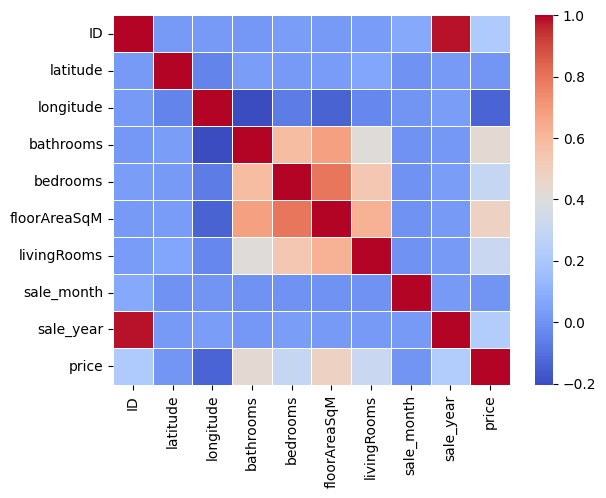

In [533]:
sns.heatmap(num_corr, 
    cmap="coolwarm",
    linewidths=0.5,)
plt.show()

- Examine relationships between features and target

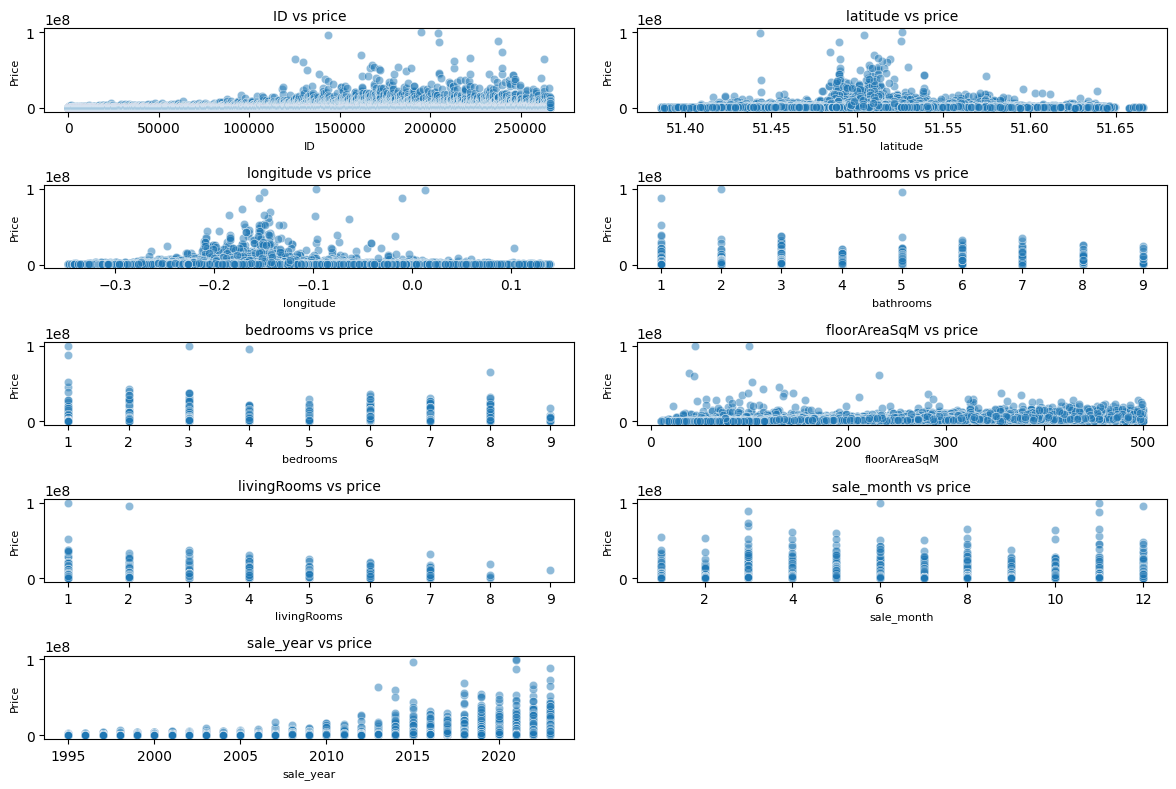

In [534]:
n_cols = 2  # Number of columns in the grid
n_rows = (len(numerical_features_withoutPrice) // n_cols) + 1  # Calculate rows needed

plt.figure(figsize=(12, 8))  # Adjust figure size for readability

# Loop through features and plot in subplots
for i, feature in enumerate(numerical_features_withoutPrice, 1):
    plt.subplot(n_rows, n_cols, i)  # Position in grid (rows, cols, index)
    sns.scatterplot(data=train, x=feature, y='price', alpha=0.5)  # Alpha for transparency
    plt.title(f'{feature} vs price', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Price', fontsize=8)

plt.tight_layout()  # Prevent overlapping labels
plt.show()

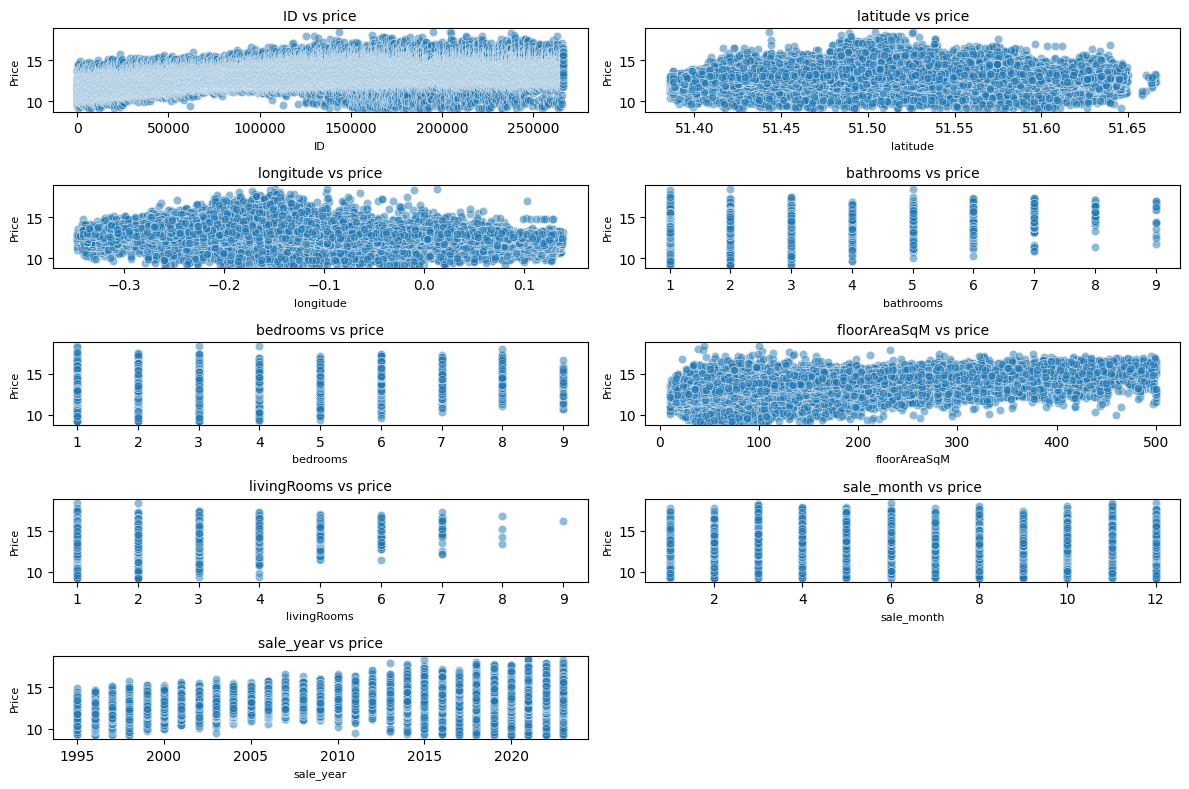

In [535]:
n_cols = 2  # Number of columns in the grid
n_rows = (len(numerical_features_withoutPrice) // n_cols) + 1  # Calculate rows needed

plt.figure(figsize=(12, 8))  # Adjust figure size for readability

# Loop through features and plot in subplots
for i, feature in enumerate(numerical_features_withoutPrice, 1):
    plt.subplot(n_rows, n_cols, i)  # Position in grid (rows, cols, index)
    sns.scatterplot(data=train, x=feature, y=target, alpha=0.5)  # Alpha for transparency
    plt.title(f'{feature} vs price', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Price', fontsize=8)

plt.tight_layout()  # Prevent overlapping labels
plt.show()

In [536]:
floorarea_pivot = train.pivot_table(index='floorAreaSqM',
                  values='price', aggfunc=np.mean)
floorarea_pivot

C:\Users\Basel Amer\AppData\Local\Temp\ipykernel_18196\3773200986.py:1: FutureWarning: The provided callable <function mean at 0x0000021F7F292980> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  floorarea_pivot = train.pivot_table(index='floorAreaSqM',


,price
floorAreaSqM,
10.0,2.250412e+05
11.0,3.698107e+05
12.0,7.250000e+05
13.0,2.479667e+05
14.0,4.072500e+05
...,...
496.0,4.481250e+06
497.0,2.557075e+06
498.0,7.582065e+06


- Visualize numerical features

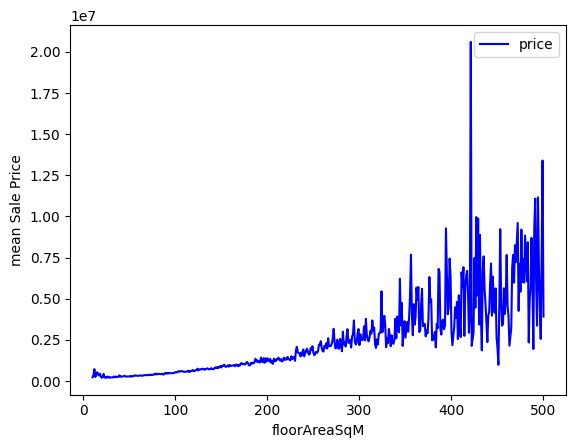

In [537]:
floorarea_pivot.plot(kind='line', color='blue')
plt.xlabel('floorAreaSqM')
plt.ylabel('mean Sale Price')
plt.xticks(rotation=0)
plt.show()

In [538]:
bathroomsnum_pivot = train.pivot_table(index='bathrooms',
                  values='price', aggfunc=np.mean)


C:\Users\Basel Amer\AppData\Local\Temp\ipykernel_18196\1621063736.py:1: FutureWarning: The provided callable <function mean at 0x0000021F7F292980> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  bathroomsnum_pivot = train.pivot_table(index='bathrooms',


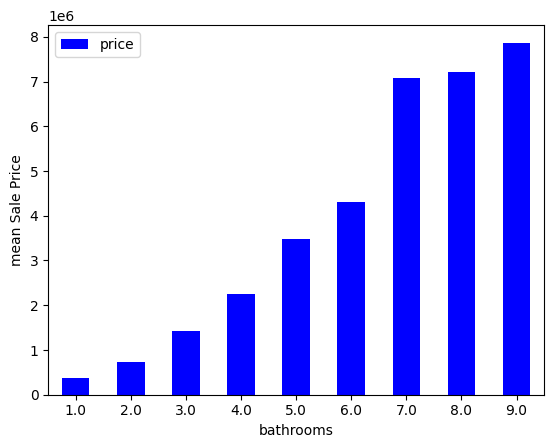

In [539]:
bathroomsnum_pivot.plot(kind='bar', color='blue',)
plt.xlabel('bathrooms')
plt.ylabel('mean Sale Price')
plt.xticks(rotation=0)
plt.show()

C:\Users\Basel Amer\AppData\Local\Temp\ipykernel_18196\1857377935.py:1: FutureWarning: The provided callable <function mean at 0x0000021F7F292980> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  livingRooms_pivot = train.pivot_table(index='livingRooms',


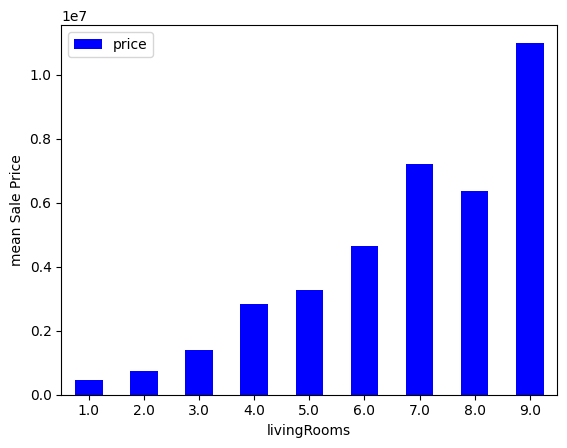

In [540]:
livingRooms_pivot = train.pivot_table(index='livingRooms',
                  values='price', aggfunc=np.mean)

livingRooms_pivot.plot(kind='bar', color='blue',)
plt.xlabel('livingRooms')
plt.ylabel('mean Sale Price')
plt.xticks(rotation=0)
plt.show()

C:\Users\Basel Amer\AppData\Local\Temp\ipykernel_18196\3554520824.py:1: FutureWarning: The provided callable <function mean at 0x0000021F7F292980> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  bedrooms_pivot = train.pivot_table(index='bedrooms',


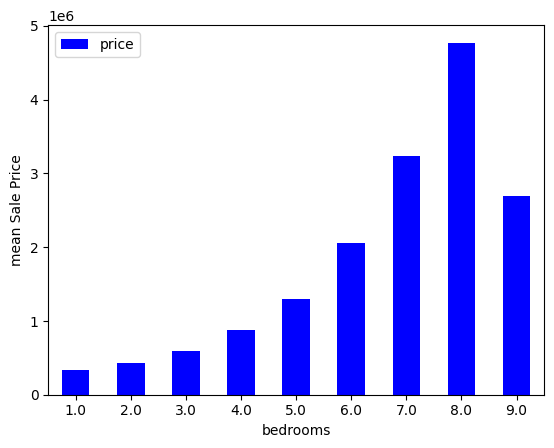

In [541]:
bedrooms_pivot = train.pivot_table(index='bedrooms',
                  values='price', aggfunc=np.mean)

bedrooms_pivot.plot(kind='bar', color='blue',)
plt.xlabel('bedrooms')
plt.ylabel('mean Sale Price')
plt.xticks(rotation=0)
plt.show()

C:\Users\Basel Amer\AppData\Local\Temp\ipykernel_18196\1307346910.py:1: FutureWarning: The provided callable <function mean at 0x0000021F7F292980> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  saleyear_pivot = train.pivot_table(index='sale_year',


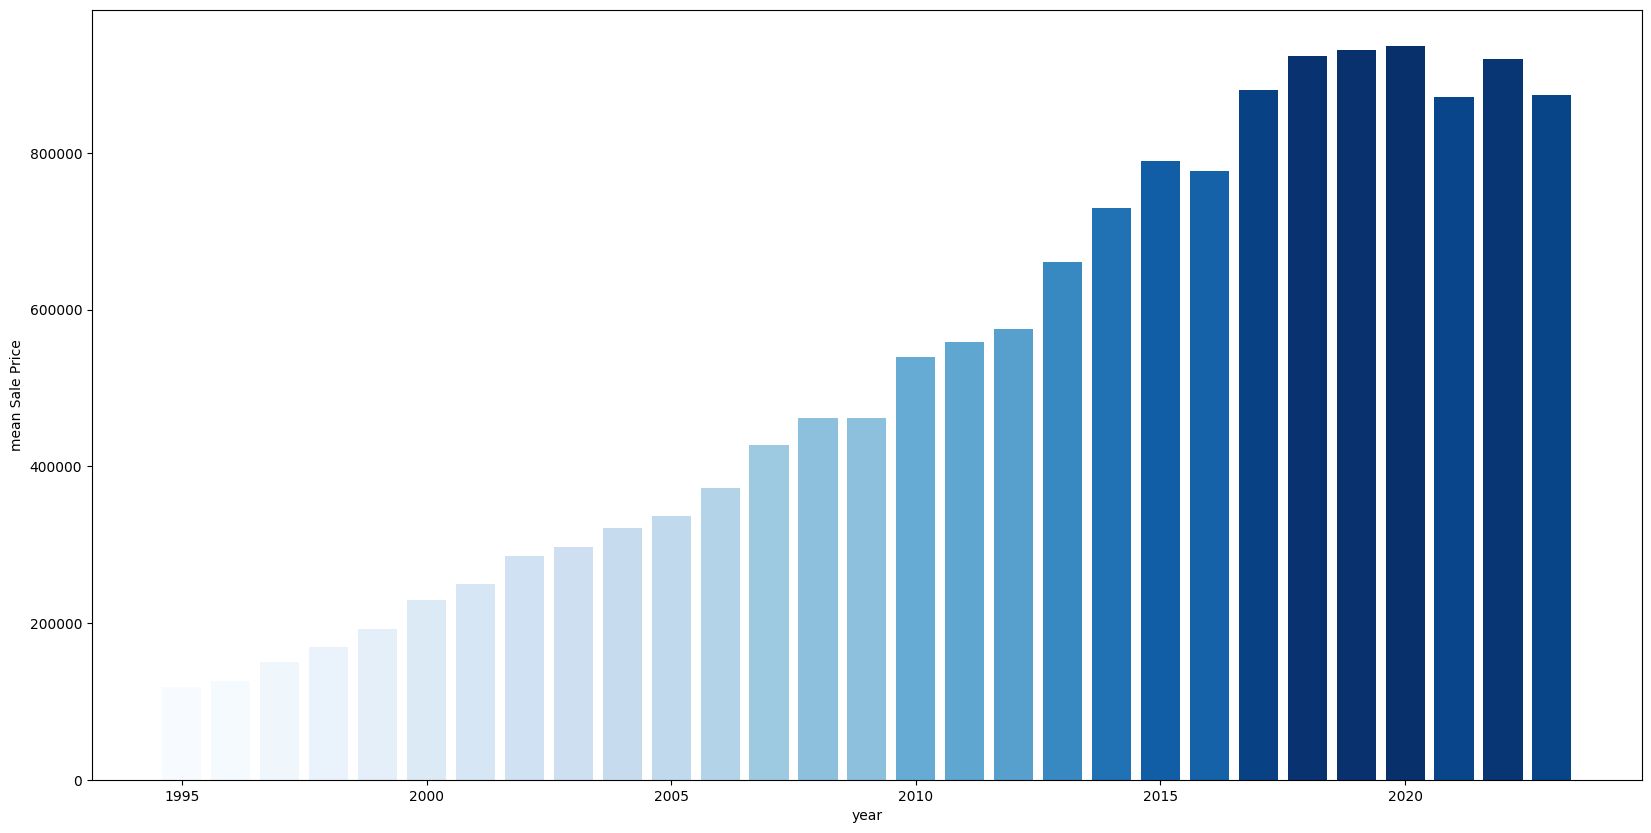

In [542]:
saleyear_pivot = train.pivot_table(index='sale_year',
                  values='price', aggfunc=np.mean)

norm = plt.Normalize(saleyear_pivot['price'].min(), saleyear_pivot['price'].max())
colors = plt.cm.Blues(norm(saleyear_pivot['price']))  # Use 'Blues' colormap (or try 'Reds', 'Greens')
plt.figure(figsize=(20, 10))
bars = plt.bar(saleyear_pivot.index, saleyear_pivot['price'], color=colors)
plt.xlabel('year')
plt.ylabel('mean Sale Price')
plt.xticks(rotation=0)
plt.show()

C:\Users\Basel Amer\AppData\Local\Temp\ipykernel_18196\3442451812.py:1: FutureWarning: The provided callable <function mean at 0x0000021F7F292980> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  salemonth_pivot = train.pivot_table(index='sale_month', values='price', aggfunc=np.mean)


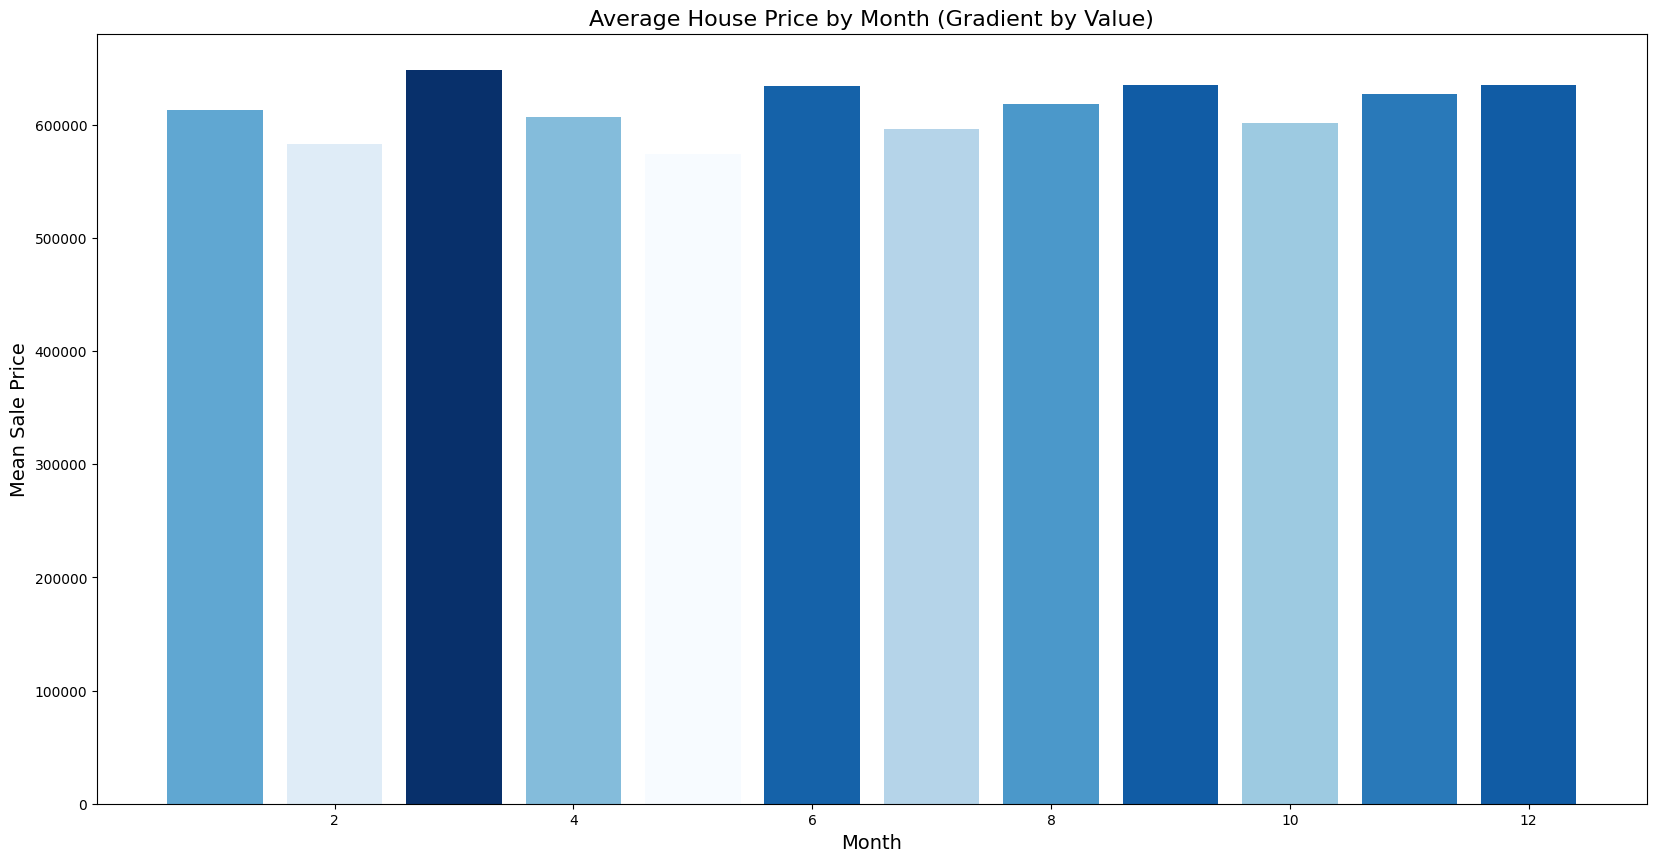

In [543]:
salemonth_pivot = train.pivot_table(index='sale_month', values='price', aggfunc=np.mean)

# Normalize values to range [0,1] for color mapping
norm = plt.Normalize(salemonth_pivot['price'].min(), salemonth_pivot['price'].max())
colors = plt.cm.Blues(norm(salemonth_pivot['price']))  # Use 'Blues' colormap (or try 'Reds', 'Greens')

# Plot with gradient colors
plt.figure(figsize=(20, 10))
bars = plt.bar(salemonth_pivot.index, salemonth_pivot['price'], color=colors)



# Customize labels and title
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean Sale Price', fontsize=14)
plt.xticks(rotation=0)
plt.title('Average House Price by Month (Gradient by Value)', fontsize=16)
plt.show()

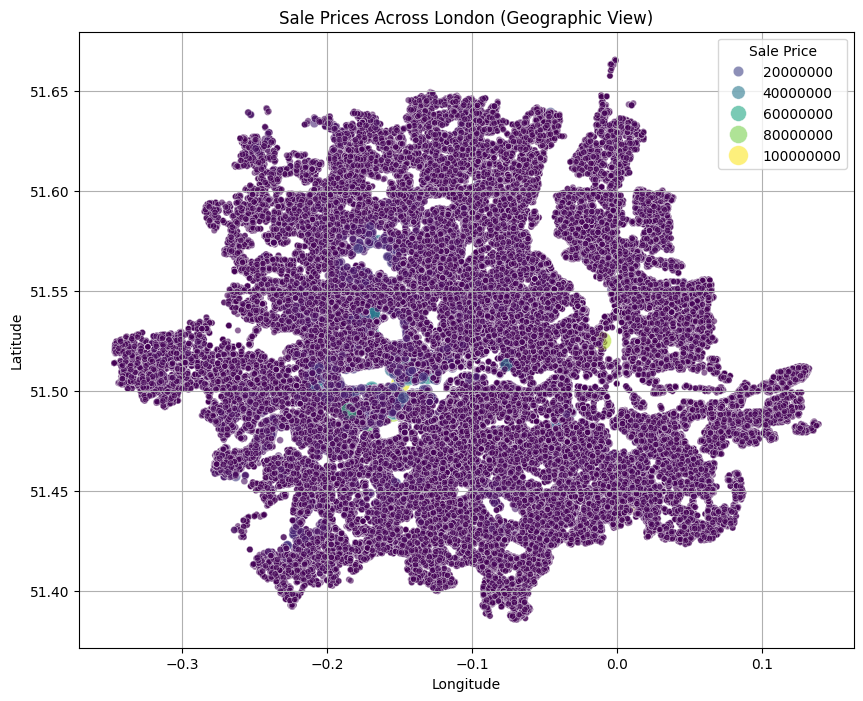

In [544]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=train, 
    x='longitude', 
    y='latitude', 
    hue='price',
    palette='viridis',  # or 'coolwarm', 'plasma'
    size='price',
    sizes=(20, 200),
    alpha=0.6
)
plt.title("Sale Prices Across London (Geographic View)")
plt.legend(title='Sale Price', loc='upper right')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


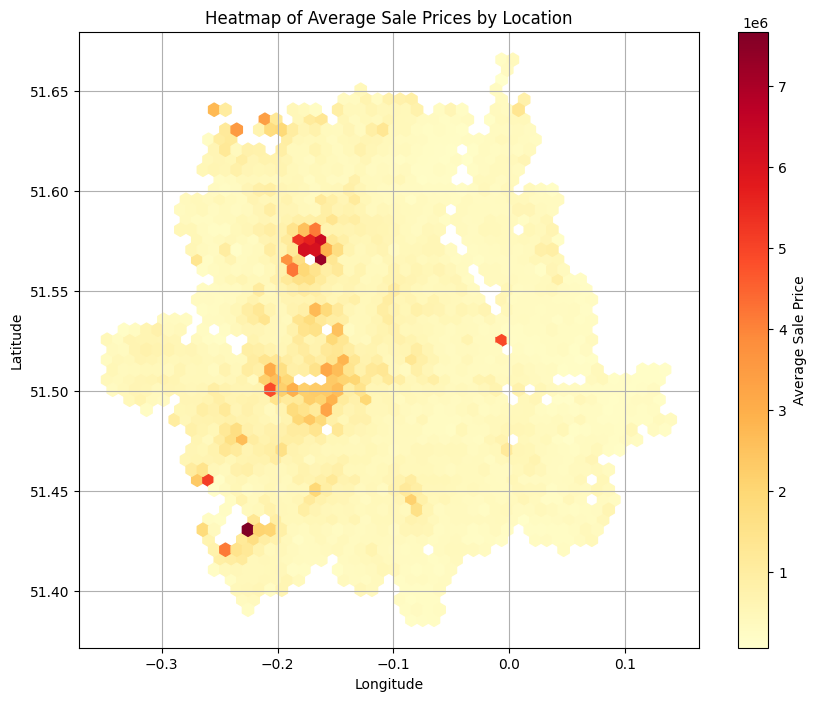

In [545]:
plt.figure(figsize=(10, 8))
plt.hexbin(
    train['longitude'], 
    train['latitude'], 
    C=train['price'], 
    gridsize=50, 
    # reduce_C_function=np.absolute, 
    cmap='YlOrRd'
)
cb = plt.colorbar()
cb.set_label('Average Sale Price')
plt.title("Heatmap of Average Sale Prices by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [546]:
# train['LogPrice'] = np.log1p(train['price'])

# plt.figure(figsize=(10, 8))
# sns.scatterplot(
#     data=train,
#     x='longitude',
#     y='latitude',
#     hue='LogPrice',
#     palette='viridis',
#     size='LogPrice',
#     sizes=(20, 200),
#     alpha=0.6
# )
# plt.title("Log(Sale Price) Across London")
# plt.legend(title='Log(SalePrice)', loc='upper right')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.grid(True)
# plt.show()


In [547]:
train.floorAreaSqM

0          80.0
1         110.0
2          84.0
3          72.0
4         104.0
          ...  
266320     83.0
266321     69.0
266322     50.0
266323    130.0
266324      NaN
Name: floorAreaSqM, Length: 266325, dtype: float64

Dealing with Categorical Features

In [548]:
categorical_features = train.select_dtypes(include=[np.object_]).columns
# catecategorical_features.dtypes
categorical_features

Index(['fullAddress', 'postcode', 'country', 'outcode', 'tenure',
       'propertyType', 'currentEnergyRating'],
      dtype='object')

In [549]:
train['currentEnergyRating'].value_counts().head(20)

currentEnergyRating
D    87925
C    78356
B    20836
E    20253
F     1519
G      436
A      186
Name: count, dtype: int64

- Visualize categorical features

Text(0.5, 1.0, 'Count of Address feature')

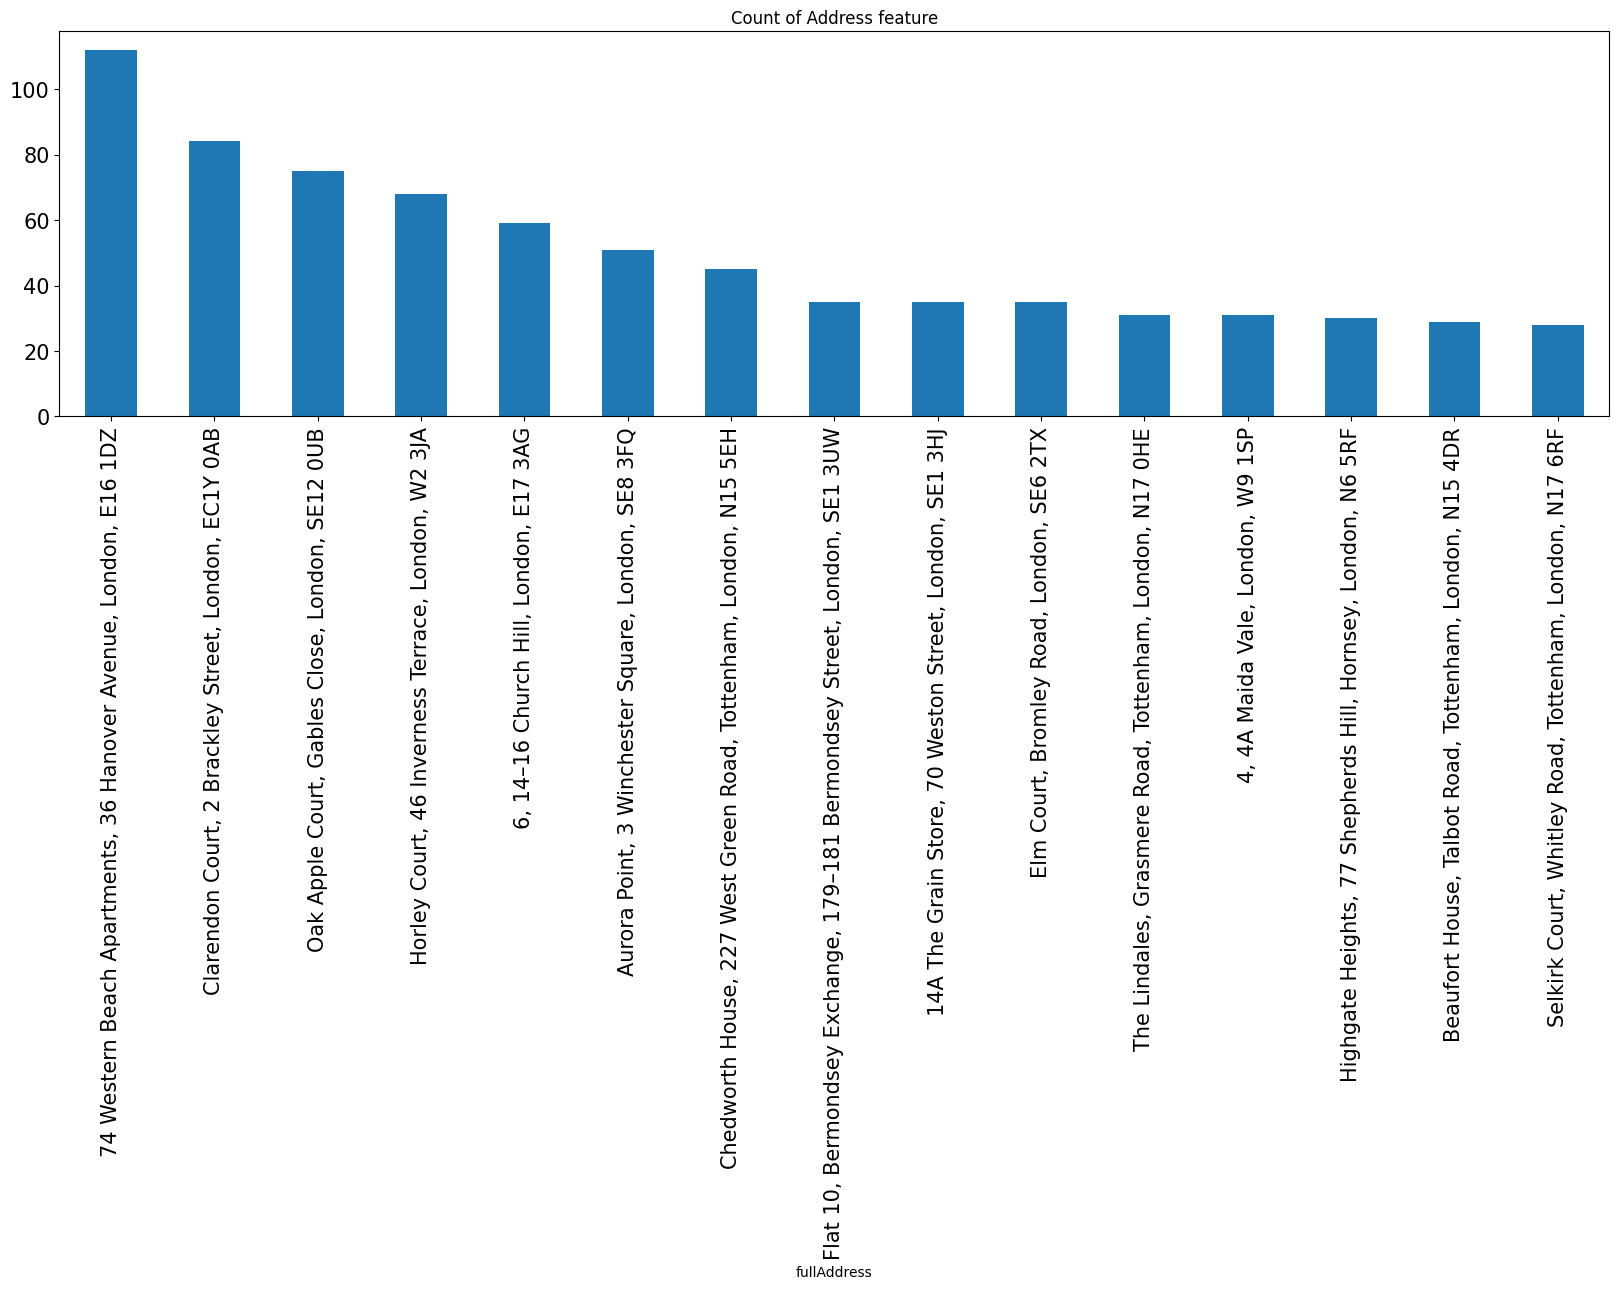

In [550]:
train['fullAddress'].value_counts().head(15).plot(kind='bar',figsize=(20,5),fontsize=15)
plt.title("Count of Address feature")


Text(0.5, 1.0, 'Count of Property Type feature')

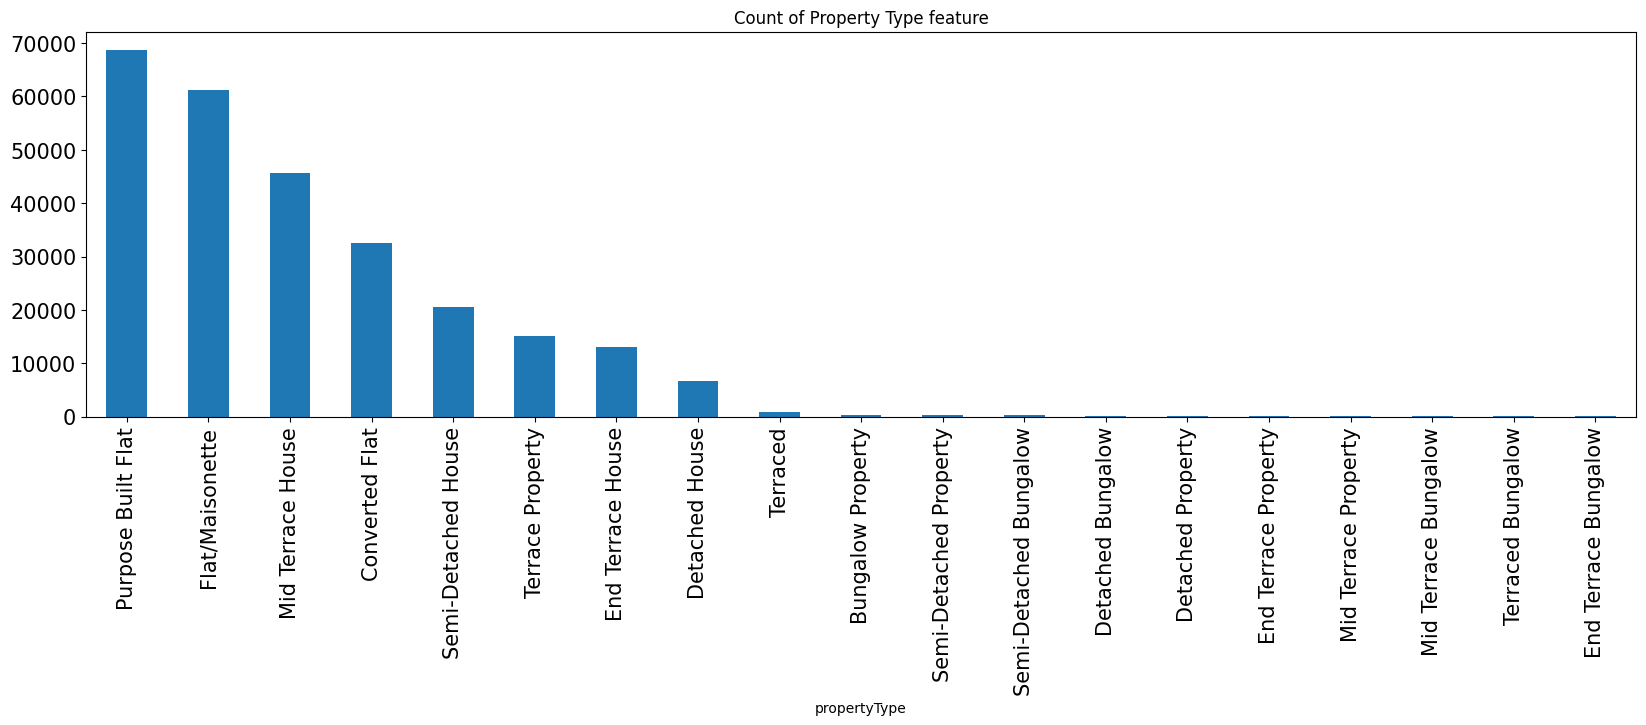

In [551]:
train['propertyType'].value_counts().plot(kind='bar',figsize=(20,5),fontsize=15)
plt.title("Count of Property Type feature")

Text(0.5, 1.0, 'Counts of Tenure feature')

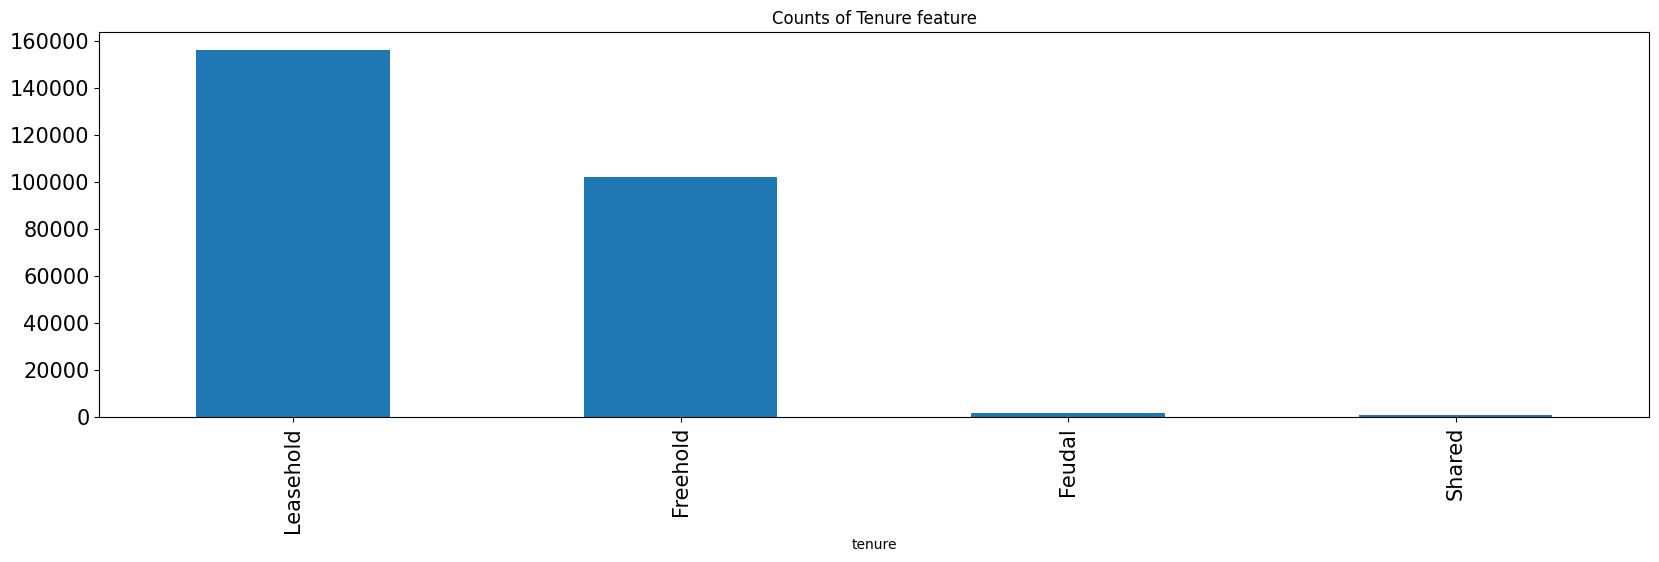

In [552]:
train['tenure'].value_counts().plot(kind='bar',figsize=(20,5),fontsize=15)
plt.title("Counts of Tenure feature")

Text(0.5, 1.0, 'Counts of postcode feature')

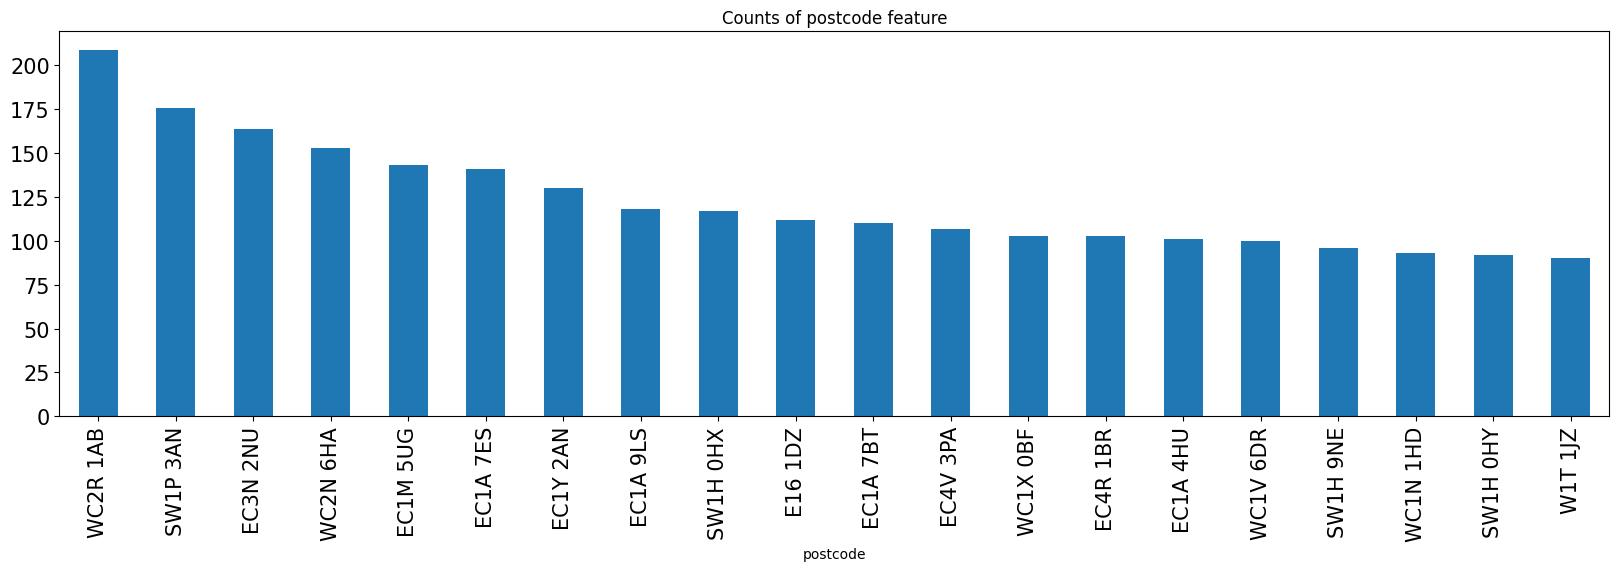

In [553]:
train['postcode'].value_counts().head(20).plot(kind='bar',figsize=(20,5),fontsize=15)
plt.title("Counts of postcode feature")

Text(0.5, 1.0, 'Counts of EnergyRating feature')

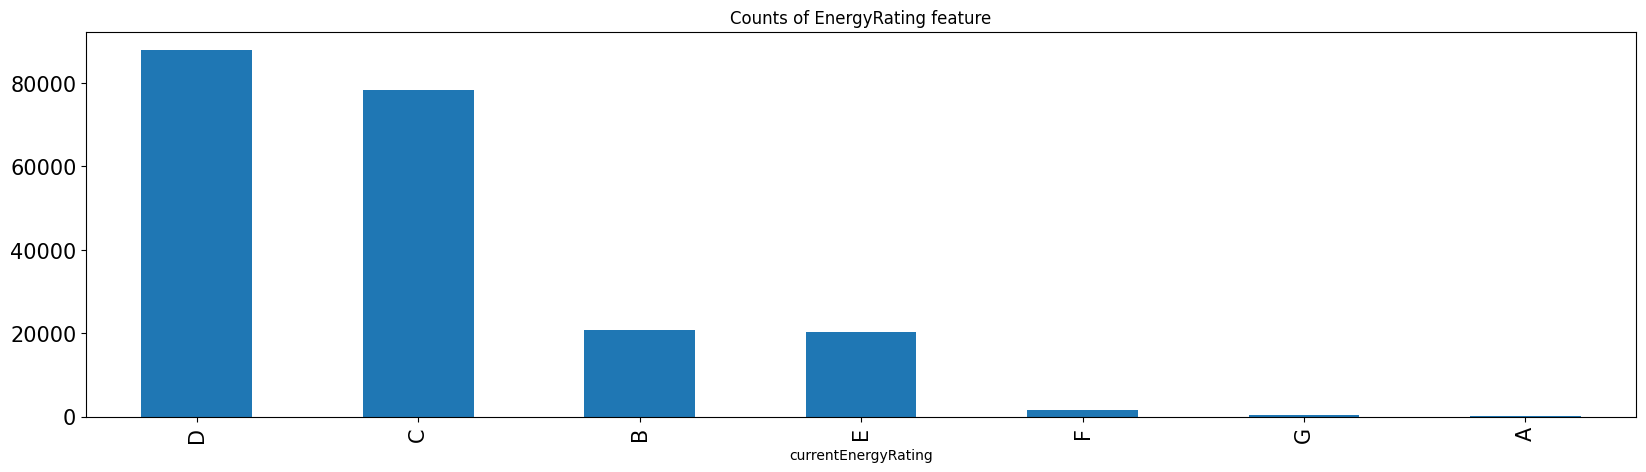

In [554]:
train['currentEnergyRating'].value_counts().plot(kind='bar',figsize=(20,5),fontsize=15)
plt.title("Counts of EnergyRating feature")

C:\Users\Basel Amer\AppData\Local\Temp\ipykernel_18196\227118800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='currentEnergyRating', y='sale_year', palette='viridis')


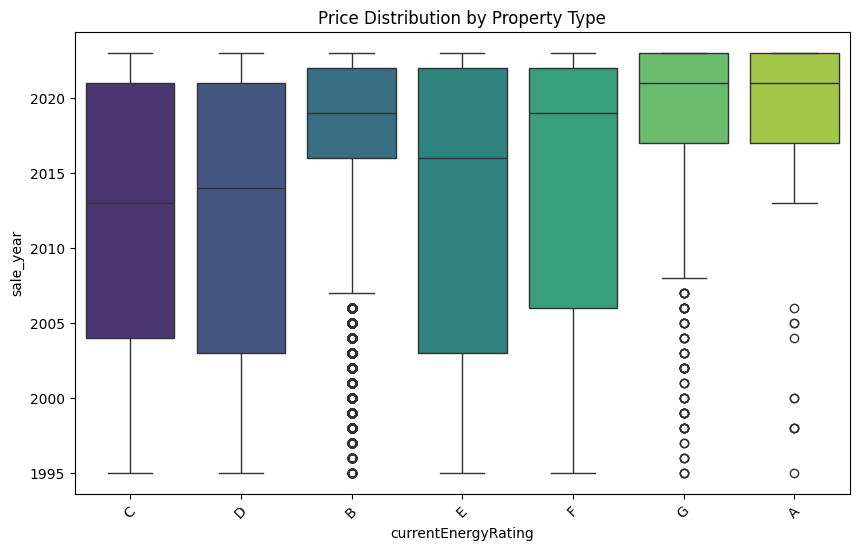

In [555]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='currentEnergyRating', y='sale_year', palette='viridis')
plt.title('Price Distribution by Property Type')
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()

- Check for time trends

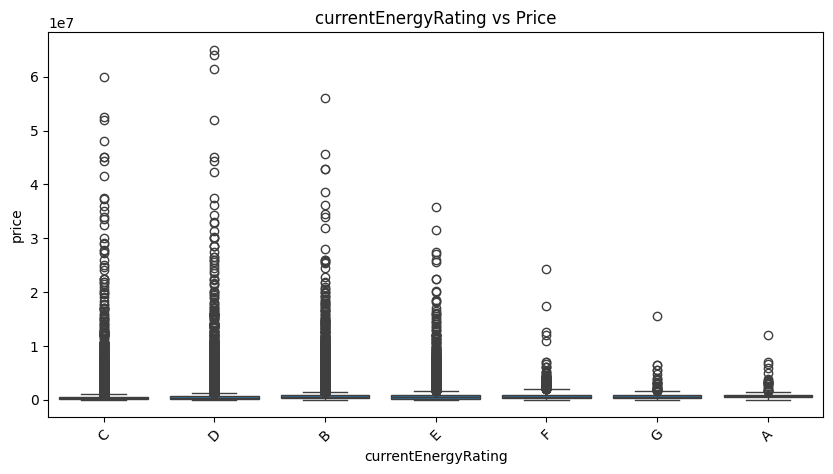

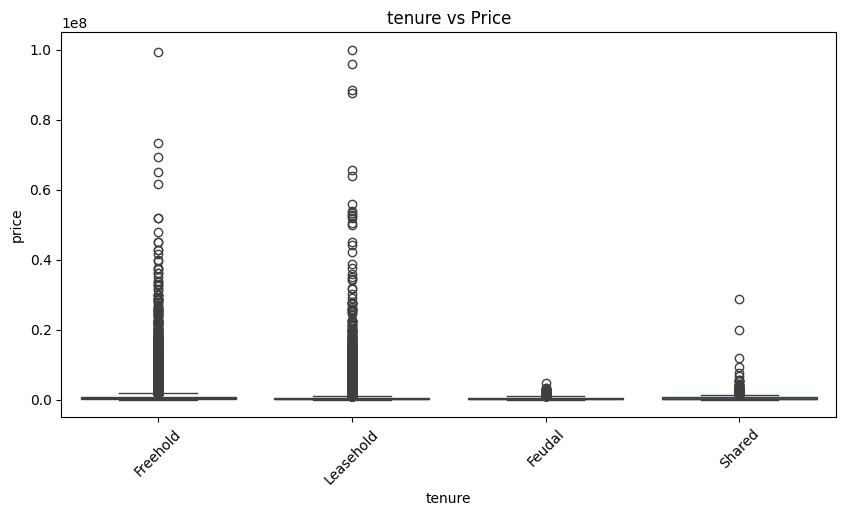

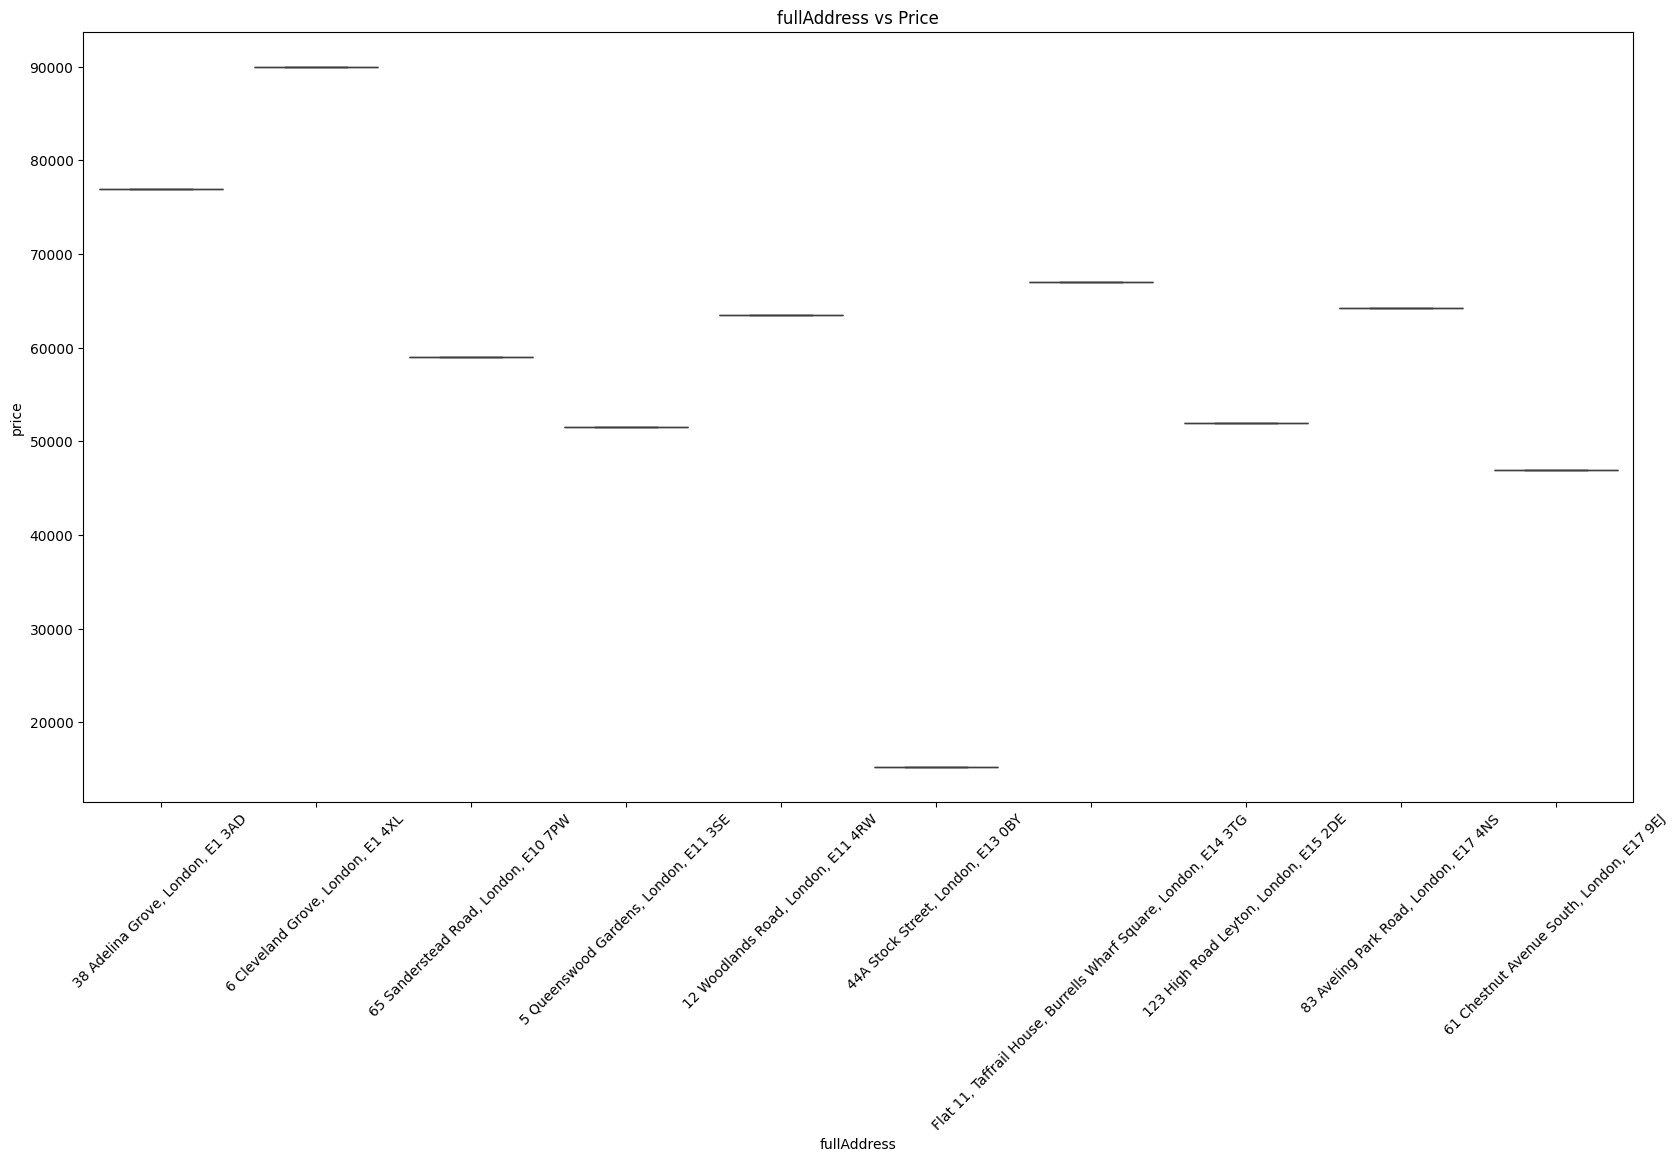

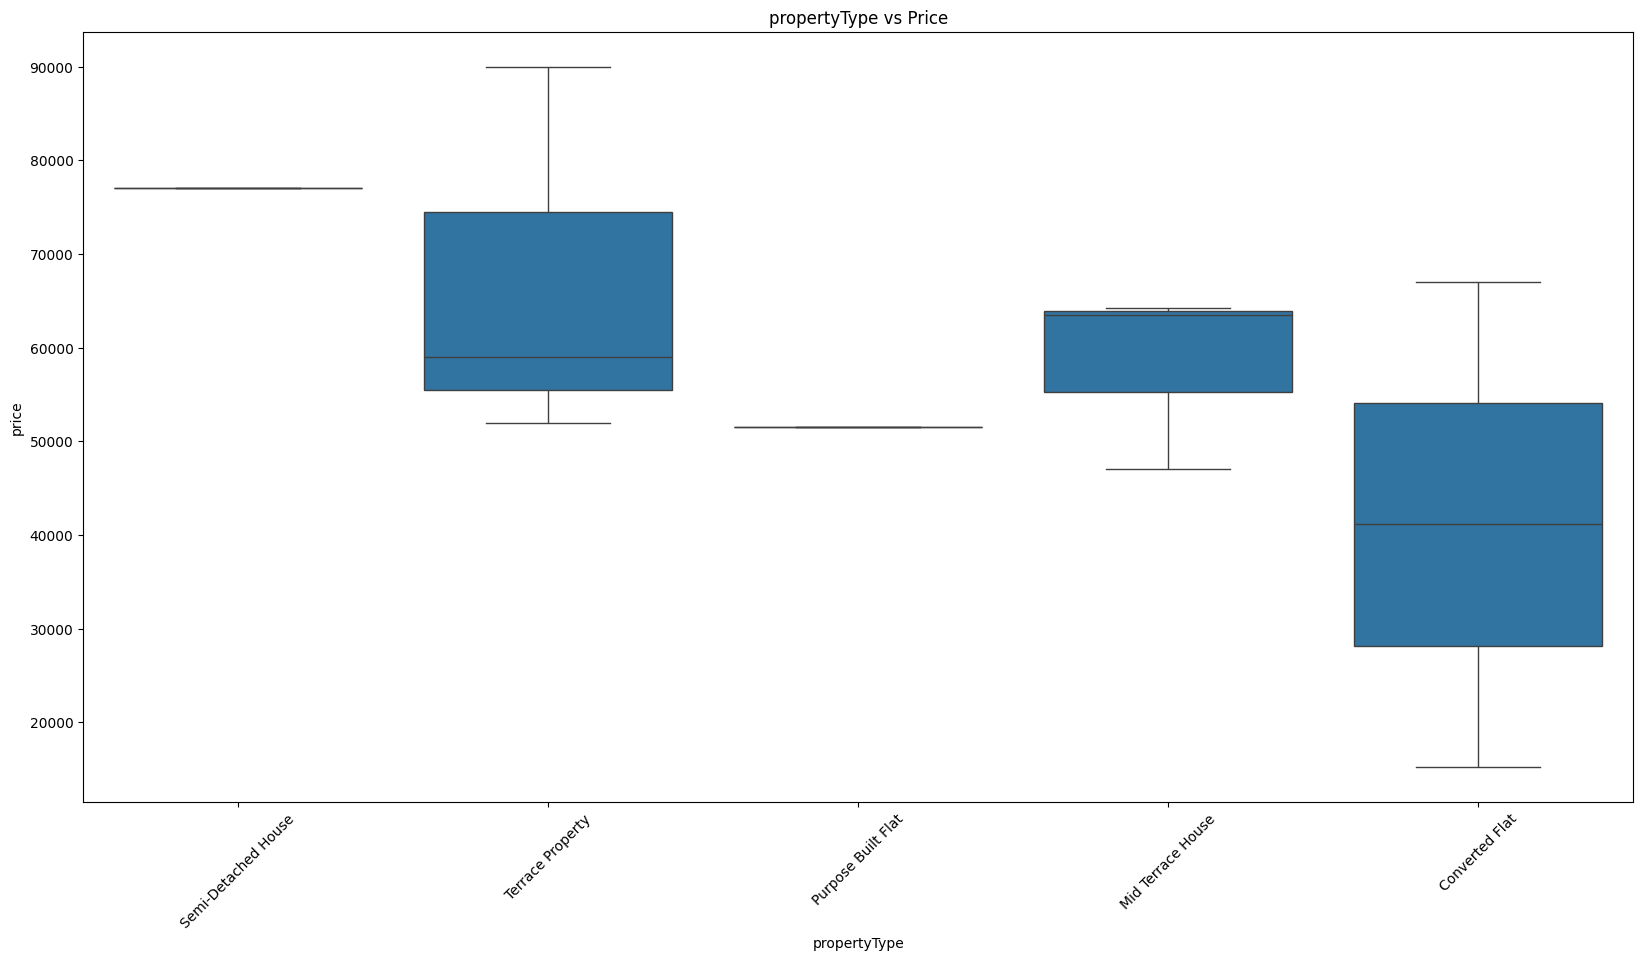

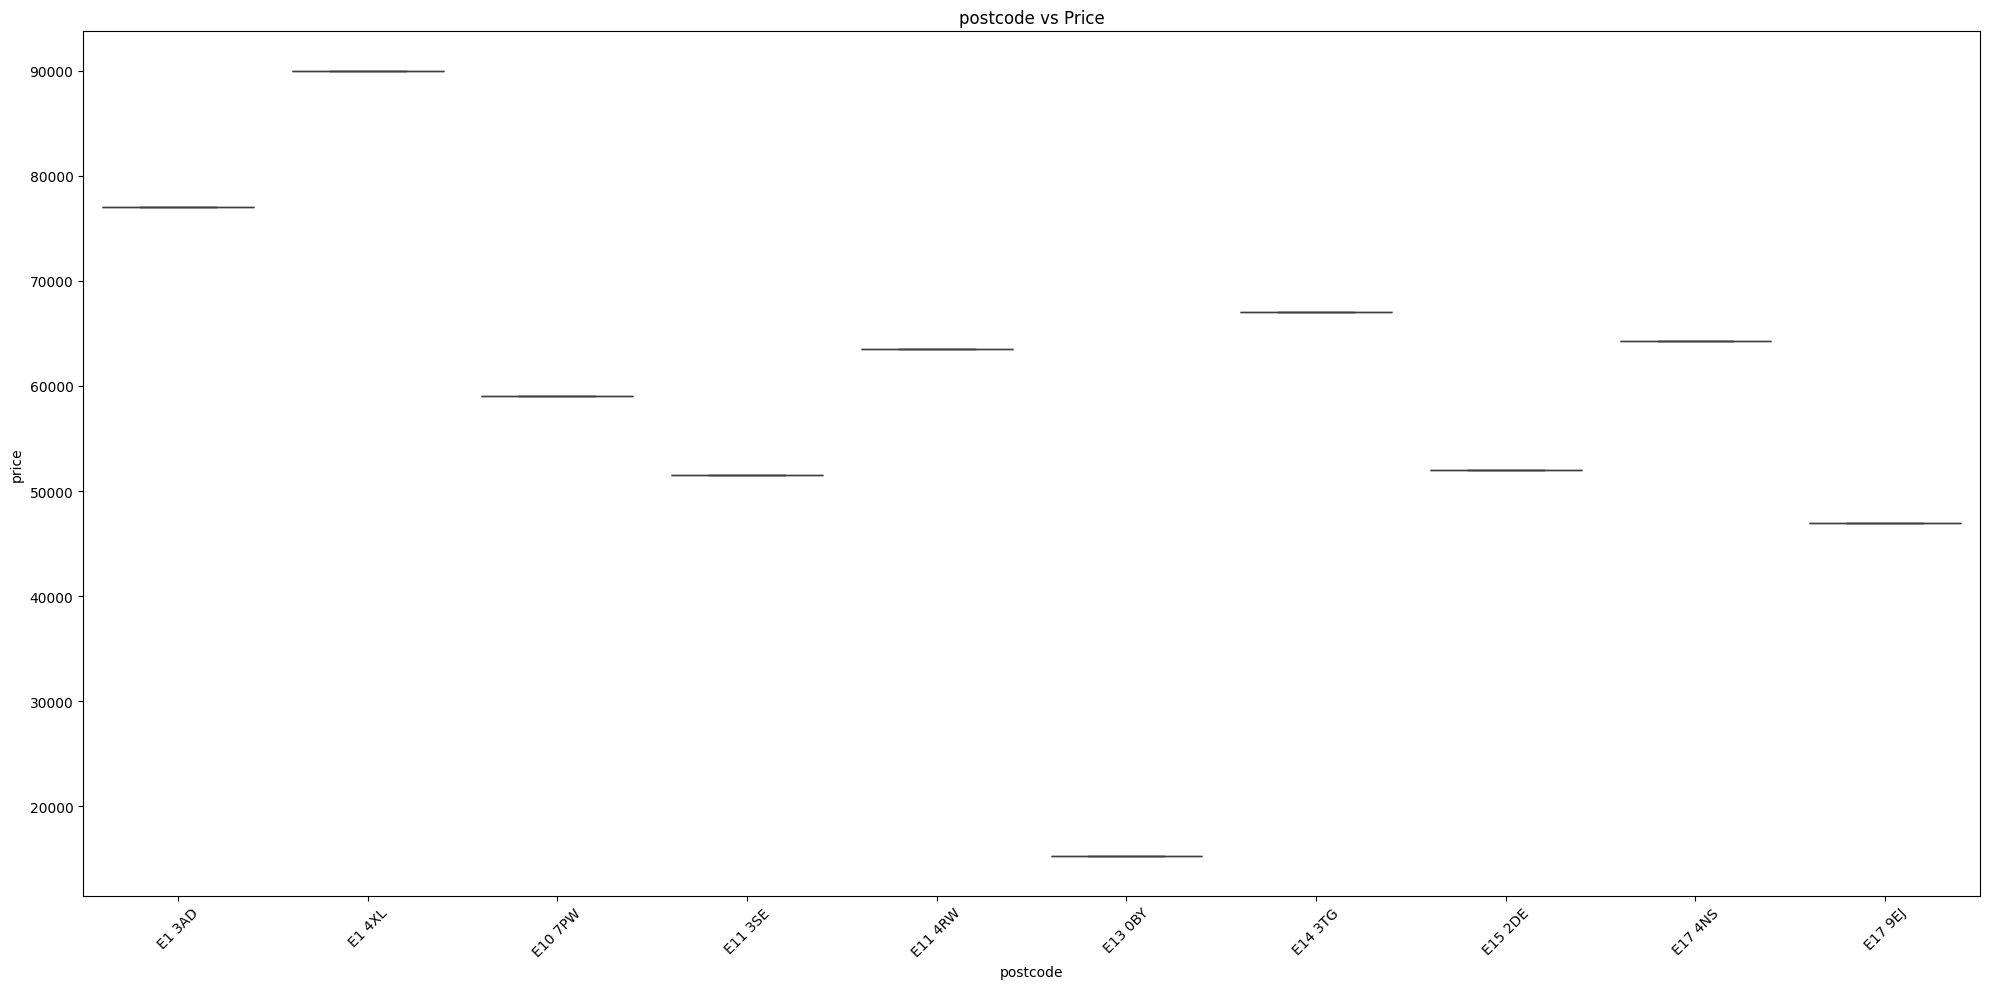

In [556]:

plt.figure(figsize=(10, 5))
sns.boxplot(x='currentEnergyRating', y='price', data=train)
plt.title("currentEnergyRating vs Price")
plt.xticks(rotation=45)

plt.figure(figsize=(10, 5))
sns.boxplot(x='tenure', y='price', data=train)
plt.title("tenure vs Price")
plt.xticks(rotation=45)

plt.figure(figsize=(20, 10))
sns.boxplot(x=train['fullAddress'].head(10), y='price', data=train)
plt.title("fullAddress vs Price")
plt.xticks(rotation=45)

plt.figure(figsize=(20, 10))
sns.boxplot(x=train['propertyType'].head(10), y='price', data=train)
plt.title("propertyType vs Price")
plt.xticks(rotation=45)

plt.figure(figsize=(20, 10))
sns.boxplot(x=train['postcode'].head(10), y='price', data=train)
plt.title("postcode vs Price")
plt.xticks(rotation=45)



# train['fullAddress'].value_counts().head(15).plot(kind='bar',figsize=(20,5),fontsize=15)


plt.tight_layout()
plt.show()

<Axes: ylabel='price'>

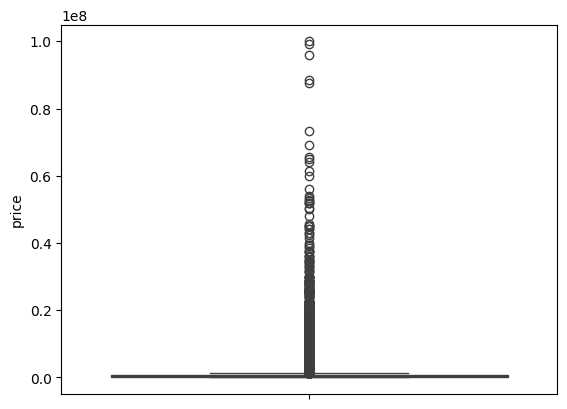

In [557]:
sns.boxplot(train['price'])

<Axes: ylabel='price'>

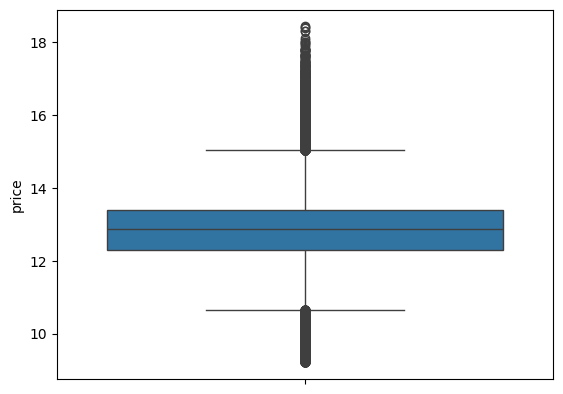

In [558]:
sns.boxplot(target)

In [559]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train['price']))
print(z)



[0.42318334 0.412984   0.43731094 ... 0.08933442 2.08681945 4.22558042]


In [560]:

# catecategorical_features = train.select_dtypes(include='object').columns

# for col in catecategorical_features:
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(x=col, y='price', data=train)
#     plt.title(f"{col} vs price")
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()





#  Step 5: Data Preprocessing


- Convert date/time fields if available
- Encode categorical variables
- Scale numerical variables
- Feature engineering (e.g., extract month/year from date, create new ratios)

- Handle missing values

In [561]:
train['currentEnergyRating']

0           C
1           D
2           D
3         NaN
4           D
         ... 
266320      E
266321      C
266322      C
266323      B
266324    NaN
Name: currentEnergyRating, Length: 266325, dtype: object

In [562]:
train['propertyType'].isnull().sum()

np.int64(508)

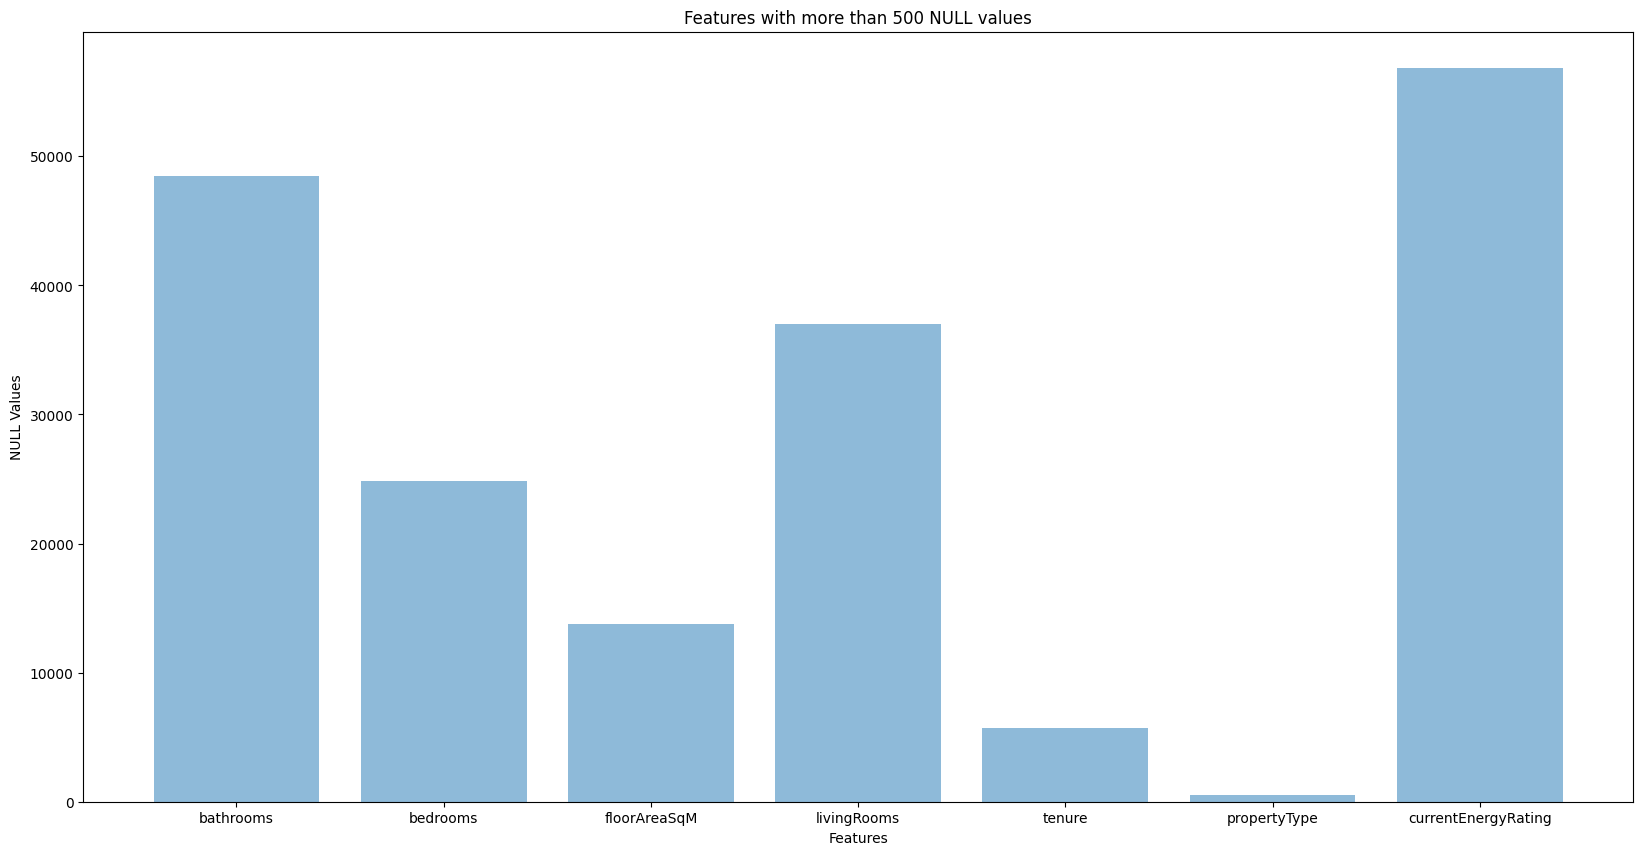

In [563]:
features = []
nullValues = []
for i in train:
    if (train.isna().sum()[i])>500 and i!='price':
        features.append(i)
        nullValues.append(train.isna().sum()[i])
y_pos = np.arange(len(features)) 
plt.figure(figsize=(20,10))
plt.bar(y_pos, nullValues, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('NULL Values')
plt.xlabel('Features')
plt.title('Features with more than 500 NULL values')
plt.show()

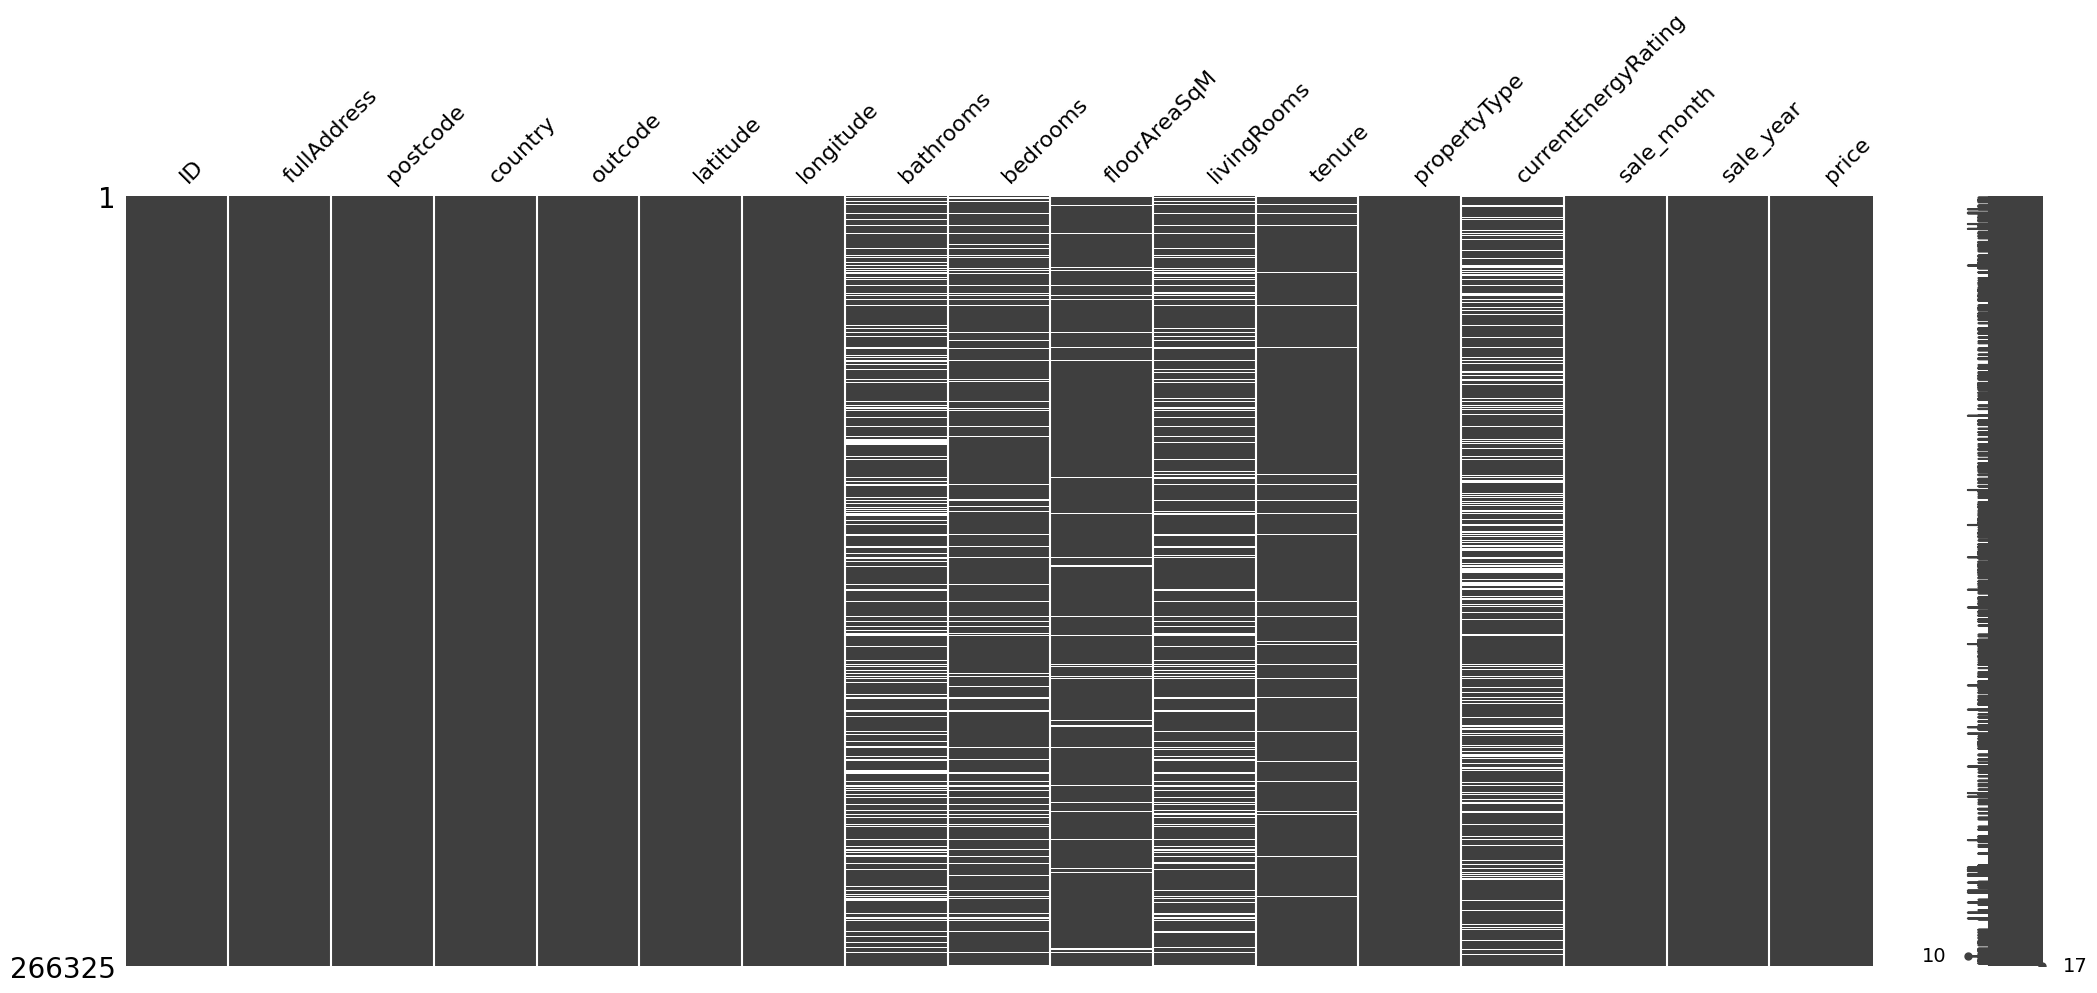

In [564]:


msno.matrix(train)
plt.show()




let us see the percetange of missing values for each feature

In [565]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)


missing_percent = (missing_values / len(train)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent.round(2)
})
missing_df

,Missing Count,Missing %
currentEnergyRating,56814,21.33
bathrooms,48479,18.20
livingRooms,37040,13.91
bedrooms,24843,9.33
floorAreaSqM,13806,5.18
tenure,5721,2.15
propertyType,508,0.19


Imutation the categorical feature

                  we will begin with propertyType feature

In [566]:
train['propertyType'].fillna(train['propertyType'].mode()[0], inplace=True)

C:\Users\Basel Amer\AppData\Local\Temp\ipykernel_18196\667203717.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['propertyType'].fillna(train['propertyType'].mode()[0], inplace=True)


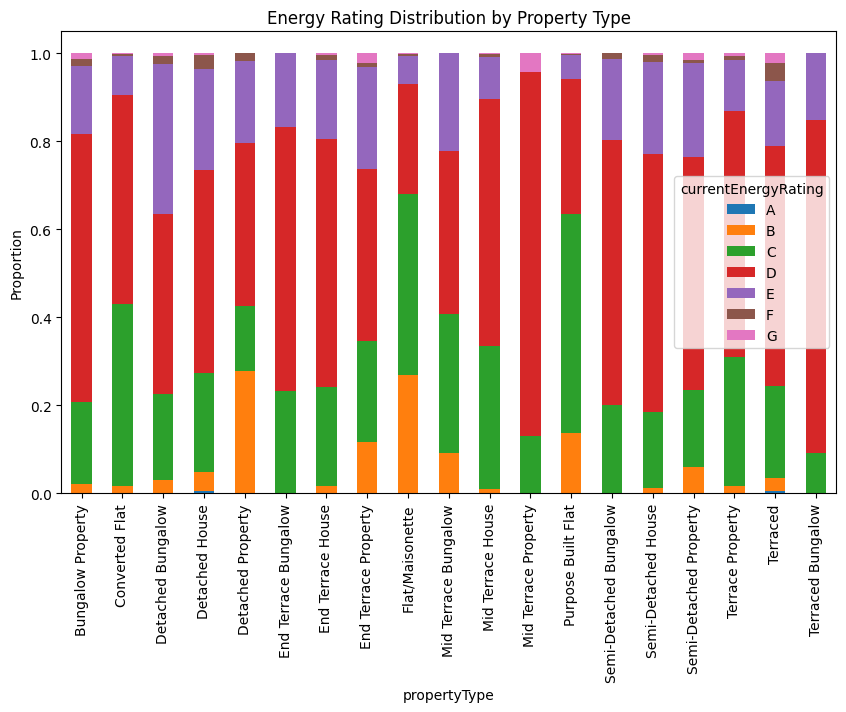

In [567]:
pd.crosstab(train['propertyType'], train['currentEnergyRating'], normalize='index').plot(
    kind='bar', stacked=True, figsize=(10, 6))
plt.title('Energy Rating Distribution by Property Type')
plt.ylabel('Proportion')
plt.show()

      we notice that currentEnergyRating is carrolated with propertyType in someway 

In [568]:
train['currentEnergyRating'] = train.groupby('propertyType')['currentEnergyRating'].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)


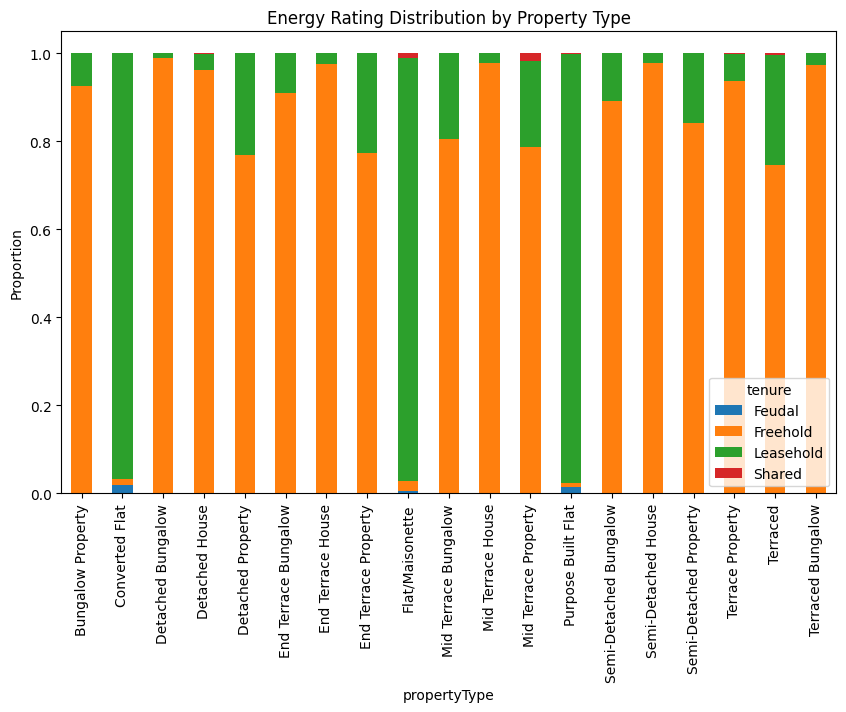

In [569]:
pd.crosstab(train['propertyType'], train['tenure'], normalize='index').plot(
    kind='bar', stacked=True, figsize=(10, 6))
plt.title('Energy Rating Distribution by Property Type')
plt.ylabel('Proportion')
plt.show()

In [570]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    r_corr = r - ((r-1)**2) / (n-1)
    k_corr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))


In [571]:

print(cramers_v(train['propertyType'], train['tenure']))


0.5532556672607303


     we also noticed a good correlation value between propertyType and tenure

In [572]:
train['tenure'] = train.groupby('propertyType')['tenure'].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)


In [573]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)


missing_percent = (missing_values / len(train)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent.round(2)
})
missing_df

,Missing Count,Missing %
bathrooms,48479,18.20
livingRooms,37040,13.91
bedrooms,24843,9.33
floorAreaSqM,13806,5.18


Now we will impute the numerical features

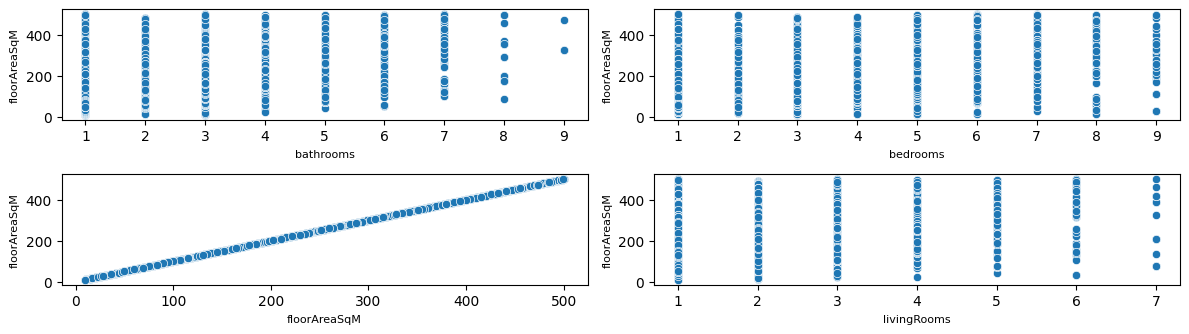

In [574]:
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = 2  # Number of columns in the grid
n_rows = (len(numerical_features_withoutPrice) // n_cols) + 1  # Calculate rows needed

plt.figure(figsize=(12, 8)) 
# Check linearity between numerical features and target (e.g., price)
num_features = ['bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms']
for i, feature in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, i) 
    sns.scatterplot(data=train, x=feature, y='floorAreaSqM')
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('floorAreaSqM', fontsize=8)


plt.tight_layout()  # Prevent overlapping labels
plt.show()




    It is obvious we have a linear relationship between those numerical features . As a result , we will use BayesianRidge as an estimator 

In [575]:
  # or use DecisionTreeRegressor, etc.

# Select the features you want to impute
features_to_impute = ['bathrooms', 'floorAreaSqM', 'bedrooms', 'livingRooms']

# Extract subset for imputation
subset = train[features_to_impute]

# Initialize the imputer
imputer = IterativeImputer(estimator=BayesianRidge(), random_state=0)

# Fit and transform
imputed_data = imputer.fit_transform(subset)

# Replace in original dataframe
train[features_to_impute] = imputed_data


c:\Users\Basel Amer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [576]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)


missing_percent = (missing_values / len(train)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent.round(2)
})
missing_df

,Missing Count,Missing %


In [577]:
train['bathrooms'] = train['bathrooms'].round()
train['bedrooms'] = train['bedrooms'].round()
train['livingRooms'] = train['livingRooms'].round()


In [578]:
train.head()

,ID,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year,price
0,0,"38 Adelina Grove, London, E1 3AD",E1 3AD,England,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000
1,1,"6 Cleveland Grove, London, E1 4XL",E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995
2,2,"65 Sanderstead Road, London, E10 7PW",E10 7PW,England,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,D,1,1995,59000
3,3,"5 Queenswood Gardens, London, E11 3SE",E11 3SE,England,E11,51.564212,0.026292,1.0,2.0,72.0,1.0,Leasehold,Purpose Built Flat,C,1,1995,51500
4,4,"12 Woodlands Road, London, E11 4RW",E11 4RW,England,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,D,1,1995,63500


Dealing with outliers

- Detect and address outliers

<Axes: ylabel='price'>

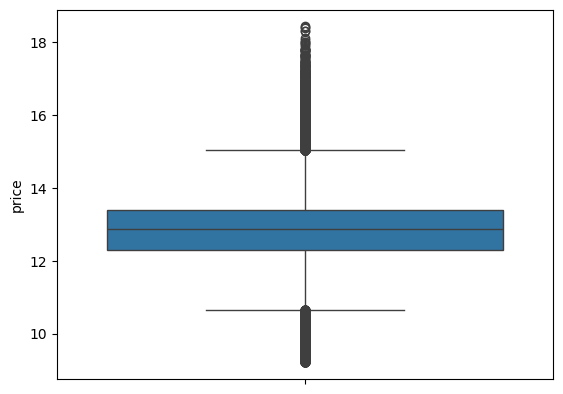

In [579]:
sns.boxplot(target)

In [580]:
low = np.percentile(target, 0.1)
high = np.percentile(target, 99.9)

# Clip values
train['log_price_clipped'] = target.clip(lower=low, upper=high)



<Axes: ylabel='log_price_clipped'>

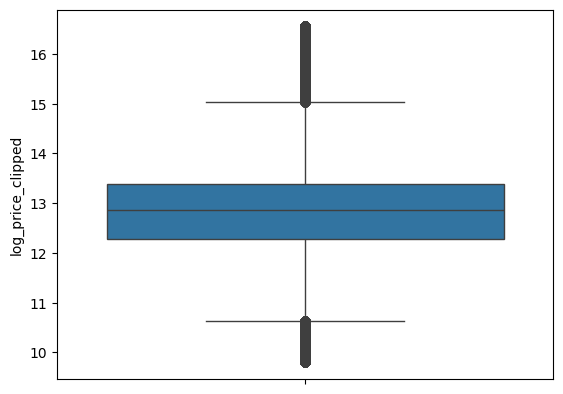

In [581]:
sns.boxplot(train['log_price_clipped'])

In [582]:
Q1 = train['bathrooms'].quantile(0.25)
Q3 = train['bathrooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['bathrooms'] < lower_bound) | (train['bathrooms'] > upper_bound)]
outliers['bathrooms'].max()

np.float64(9.0)

In [583]:
train.head(64)

,ID,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year,price,log_price_clipped
0,0,"38 Adelina Grove, London, E1 3AD",E1 3AD,England,E1,51.519406,-0.053261,1.0,3.0,80.000000,1.0,Freehold,Semi-Detached House,C,1,1995,77000,11.251574
1,1,"6 Cleveland Grove, London, E1 4XL",E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.000000,1.0,Leasehold,Terrace Property,D,1,1995,89995,11.407521
2,2,"65 Sanderstead Road, London, E10 7PW",E10 7PW,England,E10,51.569054,-0.034892,1.0,3.0,84.000000,1.0,Freehold,Terrace Property,D,1,1995,59000,10.985310
3,3,"5 Queenswood Gardens, London, E11 3SE",E11 3SE,England,E11,51.564212,0.026292,1.0,2.0,72.000000,1.0,Leasehold,Purpose Built Flat,C,1,1995,51500,10.849357
4,4,"12 Woodlands Road, London, E11 4RW",E11 4RW,England,E11,51.563430,0.006260,1.0,3.0,104.000000,1.0,Freehold,Mid Terrace House,D,1,1995,63500,11.058811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,"102 Cheddington Road, London, N18 1LR",N18 1LR,England,N18,51.620249,-0.079402,1.0,2.0,69.743553,1.0,Freehold,Terrace Property,D,1,1995,57500,10.959558
60,60,"53 Wedmore Gardens, London, N19 4SY",N19 4SY,England,N19,51.562329,-0.130103,1.0,1.0,42.000000,1.0,Leasehold,Purpose Built Flat,E,1,1995,46500,10.747229
61,61,"76 Lincoln Road, London, N2 9DL",N2 9DL,England,N2,51.591157,-0.160510,3.0,4.0,203.000000,2.0,Freehold,End Terrace House,F,1,1995,70000,11.156265
62,62,"13 Sylvester Road, London, N2 8HN",N2 8HN,England,N2,51.598317,-0.173606,2.0,4.0,176.000000,1.0,Freehold,Mid Terrace House,C,1,1995,106550,11.576379


<Axes: ylabel='bathrooms'>

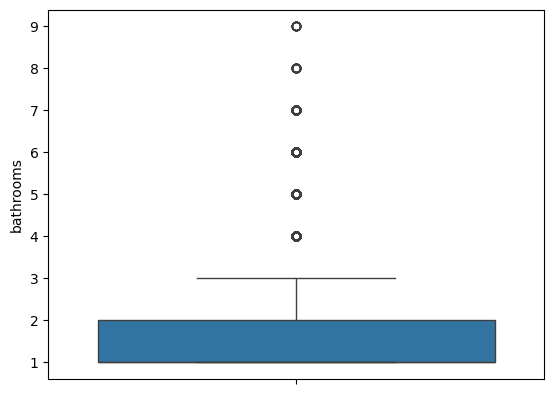

In [584]:
sns.boxplot(train['bathrooms'])

In [585]:
Q1 = train['floorAreaSqM'].quantile(0.25)
Q3 = train['floorAreaSqM'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['floorAreaSqM'] < lower_bound) | (train['floorAreaSqM'] > upper_bound)]


<Axes: ylabel='floorAreaSqM'>

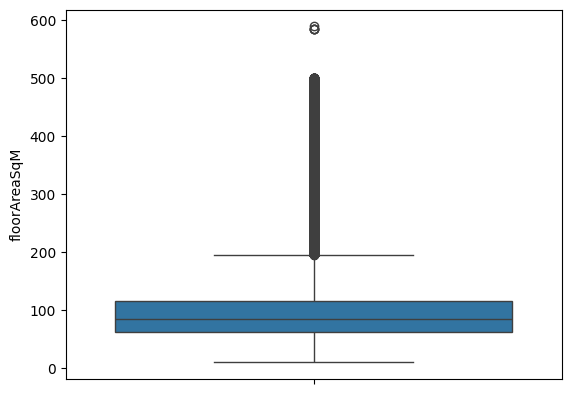

In [586]:

sns.boxplot(train['floorAreaSqM'])


<Axes: ylabel='floorAreaSqM'>

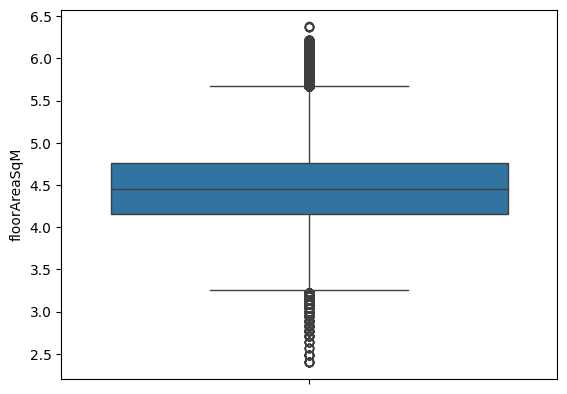

In [587]:
logfloor=np.log1p(train['floorAreaSqM'])
sns.boxplot(logfloor)

In [588]:
Q1 = train['bedrooms'].quantile(0.25)
Q3 = train['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['bedrooms'] < lower_bound) | (train['bedrooms'] > upper_bound)]
outliers.head()

,ID,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year,price,log_price_clipped
32,32,"40 Cranley Gardens, London, N10 3AP",N10 3AP,England,N10,51.586570,-0.141234,2.0,5.0,217.000000,2.0,Freehold,Semi-Detached House,D,1,1995,294000,12.591338
36,36,"15 Woodside Avenue, London, N12 8AN",N12 8AN,England,N12,51.618980,-0.181429,3.0,5.0,233.000000,2.0,Freehold,End Terrace House,C,1,1995,165000,12.013707
56,56,"707 High Road, London, N17 8AD",N17 8AD,England,N17,51.602202,-0.068525,3.0,6.0,286.000000,3.0,Freehold,Detached House,D,1,1995,100000,11.512935
63,63,"64 Winnington Road, London, N2 0TX",N2 0TX,England,N2,51.577491,-0.175040,8.0,8.0,490.698312,5.0,Freehold,Detached House,C,1,1995,1175000,13.976780
67,67,"124 Old Park Ridings, London, N21 2EP",N21 2EP,England,N21,51.646400,-0.091015,1.0,5.0,307.000000,3.0,Freehold,Detached House,B,1,1995,315000,12.660331


In [ ]:
# to get the correlation between num and cat 
def categorical_numeric_corr(df, cat_col, num_col):
    mean_encoded = df.groupby(cat_col)[num_col].mean()
    return df[cat_col].map(mean_encoded).corr(df[num_col])


In [590]:
categorical_numeric_corr(train, 'propertyType', 'price')



np.float64(0.1912274848426343)

Removing unhelpfull features

In [ ]:
train.drop(['ID', 'country','price','fullAddress'], axis=1, inplace=True)


# we could drop latitude and longitude because we noticed that there is small correlation between them and the price ( we should make sure about that)

In [592]:
train

,postcode,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year,log_price_clipped
0,E1 3AD,E1,51.519406,-0.053261,1.0,3.0,80.000000,1.0,Freehold,Semi-Detached House,C,1,1995,11.251574
1,E1 4XL,E1,51.521261,-0.053384,2.0,4.0,110.000000,1.0,Leasehold,Terrace Property,D,1,1995,11.407521
2,E10 7PW,E10,51.569054,-0.034892,1.0,3.0,84.000000,1.0,Freehold,Terrace Property,D,1,1995,10.985310
3,E11 3SE,E11,51.564212,0.026292,1.0,2.0,72.000000,1.0,Leasehold,Purpose Built Flat,C,1,1995,10.849357
4,E11 4RW,E11,51.563430,0.006260,1.0,3.0,104.000000,1.0,Freehold,Mid Terrace House,D,1,1995,11.058811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266320,WC1X 9NA,WC1X,51.528933,-0.116113,2.0,2.0,83.000000,1.0,Leasehold,Flat/Maisonette,E,12,2023,13.592368
266321,WC1X 0HT,WC1X,51.527292,-0.112005,1.0,2.0,69.000000,1.0,Leasehold,Converted Flat,C,12,2023,13.217675
266322,WC2B 5LF,WC2B,51.516084,-0.123581,1.0,2.0,50.000000,1.0,Leasehold,Purpose Built Flat,C,12,2023,13.500801
266323,WC2E 9DS,WC2E,51.511861,-0.125419,2.0,2.0,130.000000,1.0,Leasehold,Flat/Maisonette,B,12,2023,15.001829


 Categorical Feature Encoding

In [593]:
from sklearn.preprocessing import OrdinalEncoder


energy_order = ['G', 'F', 'E', 'D', 'C', 'B', 'A']
encoder = OrdinalEncoder(categories=[energy_order], handle_unknown='use_encoded_value', unknown_value=-1)
train['currentEnergyRating_encoded'] = encoder.fit_transform(train[['currentEnergyRating']])

train.drop(columns='currentEnergyRating',axis=1, inplace=True)

In [594]:
train.head()

,postcode,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,sale_month,sale_year,log_price_clipped,currentEnergyRating_encoded
0,E1 3AD,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,Semi-Detached House,1,1995,11.251574,4.0
1,E1 4XL,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,1,1995,11.407521,3.0
2,E10 7PW,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,1,1995,10.985310,3.0
3,E11 3SE,E11,51.564212,0.026292,1.0,2.0,72.0,1.0,Leasehold,Purpose Built Flat,1,1995,10.849357,4.0
4,E11 4RW,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,1,1995,11.058811,3.0


In [595]:
train['postcode'].unique()


array(['E1 3AD', 'E1 4XL', 'E10 7PW', ..., 'W8 5PP', 'W8 7LN', 'WC1X 0BY'],
      shape=(45064,), dtype=object)

     the postcode feature has an obvious cardinality (there was 45064 unique values which is considered a big number) 

In [596]:
# for later use maybe


# import pandas as pd
# from category_encoders import TargetEncoder
# from sklearn.model_selection import KFold

# # Assume train is your full DataFrame
# X = train.drop(columns=['log_price_clipped'])   # Features
# y = train['log_price_clipped']                  # Target

# # We'll encode only the 'postcode' column
# postcode = X['postcode']

# # Initialize target encoder
# te = TargetEncoder()

# # Use K-Fold to avoid target leakage
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Create an empty Series to hold the encoded values
# encoded_postcode = pd.Series(index=postcode.index, dtype=float)

# # Apply out-of-fold encoding
# for train_idx, val_idx in kf.split(X):
#     te.fit(postcode.iloc[train_idx], y.iloc[train_idx])
#     encoded_postcode.iloc[val_idx] = te.transform(postcode.iloc[val_idx]).values.flatten()

# # Replace the original postcode column with the encoded one
# X['postcode_encoded'] = encoded_postcode
# X.drop(columns=['postcode'], inplace=True)

# # Optionally join back with target
# train_encoded = X.copy()
# train_encoded['log_price_clipped'] = y


In [597]:
# train_encoded.head(266174)

In [598]:
freq_encoding = train['postcode'].value_counts() / len(train)
train['postcode_freq'] = train['postcode'].map(freq_encoding)

train.drop(columns='postcode',axis=1, inplace=True)

In [599]:
train.head()

,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,sale_month,sale_year,log_price_clipped,currentEnergyRating_encoded,postcode_freq
0,E1,51.519406,-0.053261,1.0,3.0,80.0,1.0,Freehold,Semi-Detached House,1,1995,11.251574,4.0,0.000008
1,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,1,1995,11.407521,3.0,0.000008
2,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,1,1995,10.985310,3.0,0.000023
3,E11,51.564212,0.026292,1.0,2.0,72.0,1.0,Leasehold,Purpose Built Flat,1,1995,10.849357,4.0,0.000060
4,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,1,1995,11.058811,3.0,0.000015


In [600]:
train['outcode'].value_counts()



outcode
SE18    4444
SW2     4440
N16     4163
SW4     4102
SW16    4006
        ... 
EC3V      17
EC2R       7
EC2V       7
W1C        3
EC3M       2
Name: count, Length: 167, dtype: int64

      it has high cardinality, but significantly less than postcode

In [601]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False)
encoded_outcode = encoder.fit_transform(train[['outcode']])
encoded_df =pd.DataFrame(encoded_outcode, columns=encoder.get_feature_names_out(['outcode']))

encoded_df

,outcode_E10,outcode_E11,outcode_E12,outcode_E13,outcode_E14,outcode_E15,outcode_E16,outcode_E17,outcode_E18,outcode_E1W,...,outcode_WC1N,outcode_WC1R,outcode_WC1V,outcode_WC1X,outcode_WC2A,outcode_WC2B,outcode_WC2E,outcode_WC2H,outcode_WC2N,outcode_WC2R
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
266321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
266322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
266323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


    we used drop='first' in order  to avoid multicollinearity while using linear models 

In [602]:
train = pd.concat([train.drop('outcode', axis=1), encoded_df], axis=1)


In [603]:
train

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,sale_month,sale_year,...,outcode_WC1N,outcode_WC1R,outcode_WC1V,outcode_WC1X,outcode_WC2A,outcode_WC2B,outcode_WC2E,outcode_WC2H,outcode_WC2N,outcode_WC2R
0,51.519406,-0.053261,1.0,3.0,80.000000,1.0,Freehold,Semi-Detached House,1,1995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51.521261,-0.053384,2.0,4.0,110.000000,1.0,Leasehold,Terrace Property,1,1995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51.569054,-0.034892,1.0,3.0,84.000000,1.0,Freehold,Terrace Property,1,1995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.564212,0.026292,1.0,2.0,72.000000,1.0,Leasehold,Purpose Built Flat,1,1995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51.563430,0.006260,1.0,3.0,104.000000,1.0,Freehold,Mid Terrace House,1,1995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266320,51.528933,-0.116113,2.0,2.0,83.000000,1.0,Leasehold,Flat/Maisonette,12,2023,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
266321,51.527292,-0.112005,1.0,2.0,69.000000,1.0,Leasehold,Converted Flat,12,2023,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
266322,51.516084,-0.123581,1.0,2.0,50.000000,1.0,Leasehold,Purpose Built Flat,12,2023,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
266323,51.511861,-0.125419,2.0,2.0,130.000000,1.0,Leasehold,Flat/Maisonette,12,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [604]:
encoder = OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False)
encoded_tenure = encoder.fit_transform(train[['tenure']])
encoded_df =pd.DataFrame(encoded_tenure, columns=encoder.get_feature_names_out(['tenure']))

encoded_df

,tenure_Freehold,tenure_Leasehold,tenure_Shared
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
266320,0.0,1.0,0.0
266321,0.0,1.0,0.0
266322,0.0,1.0,0.0
266323,0.0,1.0,0.0


In [605]:
train = pd.concat([train.drop('tenure', axis=1), encoded_df], axis=1)


In [606]:
train['propertyType'].value_counts()

propertyType
Purpose Built Flat        69234
Flat/Maisonette           61139
Mid Terrace House         45649
Converted Flat            32552
Semi-Detached House       20475
Terrace Property          15114
End Terrace House         13063
Detached House             6666
Terraced                    927
Bungalow Property           267
Semi-Detached Property      254
Semi-Detached Bungalow      232
Detached Bungalow           186
Detached Property           160
End Terrace Property        149
Mid Terrace Property        120
Mid Terrace Bungalow         67
Terraced Bungalow            38
End Terrace Bungalow         33
Name: count, dtype: int64

In [607]:
encoder = OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False)
encoded_propertyType = encoder.fit_transform(train[['propertyType']])
encoded_df =pd.DataFrame(encoded_propertyType, columns=encoder.get_feature_names_out(['propertyType']))

encoded_df

,propertyType_Converted Flat,propertyType_Detached Bungalow,propertyType_Detached House,propertyType_Detached Property,propertyType_End Terrace Bungalow,propertyType_End Terrace House,propertyType_End Terrace Property,propertyType_Flat/Maisonette,propertyType_Mid Terrace Bungalow,propertyType_Mid Terrace House,propertyType_Mid Terrace Property,propertyType_Purpose Built Flat,propertyType_Semi-Detached Bungalow,propertyType_Semi-Detached House,propertyType_Semi-Detached Property,propertyType_Terrace Property,propertyType_Terraced,propertyType_Terraced Bungalow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
266323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [608]:
train = pd.concat([train.drop('propertyType', axis=1), encoded_df], axis=1)

In [609]:
train

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,sale_month,sale_year,log_price_clipped,currentEnergyRating_encoded,...,propertyType_Mid Terrace Bungalow,propertyType_Mid Terrace House,propertyType_Mid Terrace Property,propertyType_Purpose Built Flat,propertyType_Semi-Detached Bungalow,propertyType_Semi-Detached House,propertyType_Semi-Detached Property,propertyType_Terrace Property,propertyType_Terraced,propertyType_Terraced Bungalow
0,51.519406,-0.053261,1.0,3.0,80.000000,1.0,1,1995,11.251574,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,51.521261,-0.053384,2.0,4.0,110.000000,1.0,1,1995,11.407521,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,51.569054,-0.034892,1.0,3.0,84.000000,1.0,1,1995,10.985310,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,51.564212,0.026292,1.0,2.0,72.000000,1.0,1,1995,10.849357,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51.563430,0.006260,1.0,3.0,104.000000,1.0,1,1995,11.058811,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266320,51.528933,-0.116113,2.0,2.0,83.000000,1.0,12,2023,13.592368,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266321,51.527292,-0.112005,1.0,2.0,69.000000,1.0,12,2023,13.217675,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266322,51.516084,-0.123581,1.0,2.0,50.000000,1.0,12,2023,13.500801,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
266323,51.511861,-0.125419,2.0,2.0,130.000000,1.0,12,2023,15.001829,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [610]:
from sklearn.feature_selection import VarianceThreshold

# Select only numeric columns
numeric_cols = train.select_dtypes(include=['int64', 'float64'])

# Fit VarianceThreshold (e.g., threshold=0.01 means less than 1% variability)
selector = VarianceThreshold(threshold=0.01)
selector.fit(numeric_cols)

# Get names of low variance features
low_variance_cols = numeric_cols.columns[~selector.get_support()]
print("Low variance features:", list(low_variance_cols))

Low variance features: ['latitude', 'longitude', 'postcode_freq', 'outcode_E10', 'outcode_E12', 'outcode_E13', 'outcode_E14', 'outcode_E15', 'outcode_E16', 'outcode_E18', 'outcode_E1W', 'outcode_E2', 'outcode_E3', 'outcode_E4', 'outcode_E5', 'outcode_E6', 'outcode_E7', 'outcode_E8', 'outcode_E9', 'outcode_EC1A', 'outcode_EC1M', 'outcode_EC1N', 'outcode_EC1R', 'outcode_EC1V', 'outcode_EC1Y', 'outcode_EC2A', 'outcode_EC2M', 'outcode_EC2R', 'outcode_EC2V', 'outcode_EC2Y', 'outcode_EC3A', 'outcode_EC3M', 'outcode_EC3N', 'outcode_EC3R', 'outcode_EC3V', 'outcode_EC4A', 'outcode_EC4M', 'outcode_EC4R', 'outcode_EC4V', 'outcode_EC4Y', 'outcode_N10', 'outcode_N11', 'outcode_N12', 'outcode_N13', 'outcode_N14', 'outcode_N18', 'outcode_N19', 'outcode_N2', 'outcode_N20', 'outcode_N21', 'outcode_N3', 'outcode_N4', 'outcode_N5', 'outcode_N6', 'outcode_N7', 'outcode_N9', 'outcode_NW1', 'outcode_NW10', 'outcode_NW11', 'outcode_NW2', 'outcode_NW3', 'outcode_NW4', 'outcode_NW5', 'outcode_NW6', 'outcode_NW

In [611]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# model.fit(train,target)
# importances = model.feature_importances_

In [612]:
# from catboost import CatBoostRegressor, Pool

# # List of categorical columns

# X = train.drop(columns=['price', 'fullAddress','ID','log_price_clipped'])
# y = train['log_price_clipped']

# cat_features = ['currentEnergyRating', 'tenure','postcode','outcode','country']  # example
# X[cat_features] = X[cat_features].astype(str)
# # Create training Pool
# train_pool = Pool(data=X, label=y, cat_features=cat_features)

# # Initialize CatBoost
# model = CatBoostRegressor(verbose=100, iterations=1000, learning_rate=0.05)

# # Train
# model.fit(train_pool)

# # # Predict
# # preds = model.predict(X_test)


In [613]:
# feature_importances = model.get_feature_importance()
# features = model.feature_names_

# plt.figure(figsize=(10, 6))
# plt.barh(features, feature_importances)
# plt.title('Feature Importance (CatBoost)')
# plt.xlabel('Importance Score')
# plt.show()

# 📌 Step 6: Feature Selection (Optional)
- Use correlation, feature importance, or dimensionality reduction if needed

# 📌 Step 7: Model Building
- Split training data into train and validation sets
- Try different regression models:
  - Linear Regression
  - Random Forest
  - Gradient Boosting (e.g., XGBoost, LightGBM)
- Use cross-validation

# 📌 Step 8: Evaluation
- Evaluate models using MAE on validation set
- Plot actual vs predicted prices
- Select the best-performing model

# 📌 Step 9: Explainability
- Use SHAP or permutation importance to identify key features

# 📌 Step 10: Predict on Test Set
- Use the trained model to predict test.csv data
- Prepare final predictions

# 📌 Step 11: Create Submission File
- Fill sample_submission.csv with predictions
- Save as submission.csv

# 📌 Step 12: Conclusion and Insights
- Discuss model performance
- Share insights about important features affecting house prices
- Reflect on limitations and possible improvements